# Prepration

In [2]:
import pandas as pd
import numpy as np
from helper import *
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
current_month = pd.Timestamp.now().month
current_year = pd.Timestamp.now().year

cpu_data = get_cpu_table(current_month, current_year)
gpu_data = get_gpu_table(current_month, current_year)

full_relation = get_full_relation(current_month, current_year)

Connection to PostgreSQL DB successful
Connection to PostgreSQL DB successful
Connection to PostgreSQL DB successful


Preview the data

In [4]:
print(f"CPU Data: {cpu_data.shape[0]} rows, {cpu_data.shape[1]} columns")
print(f"GPU Data: {gpu_data.shape[0]} rows, {gpu_data.shape[1]} columns")
print(f"Full Relation Data: {full_relation.shape[0]} rows, {full_relation.shape[1]} columns")

CPU Data: 2346 rows, 28 columns
GPU Data: 618 rows, 13 columns
Full Relation Data: 2702 rows, 70 columns


# Data Analasys

## CPU Dataframe

### Preview the data

#### Dataframe head

In [5]:
# Display the first few rows
print(cpu_data.head())

                     name performance_clockspeed performance_turbospeed  \
0      amd ryzen 9 7940hx                   2.40                   5.20   
1      amd ryzen 9 7945hx                   2.50                   5.40   
2    apple m3 max 14 core                   4.00                   None   
3  via eden (duplicate 1)                   1.20                   None   
4    omap4 espresso board                   1.00                   None   

   performance_cores  performance_threads efficient_clockspeed  \
0               16.0                 32.0                 None   
1               16.0                 32.0                 None   
2               10.0                 10.0                 None   
3                1.0                  1.0                 None   
4                2.0                  2.0                 None   

  efficient_turbospeed  efficient_cores  efficient_threads    tdp  ...  \
0                 None              NaN                NaN  55.00  ...   
1   

#### Dataframe tail

In [6]:
# Display the first few rows
print(cpu_data.tail())

                       name performance_clockspeed performance_turbospeed  \
2341  intel core i9 13900hx                   2.20                   5.40   
2342  intel core i9 14900hx                   2.20                   5.80   
2343     amd ryzen 9 7845hx                   3.00                   5.20   
2344  intel core i9 13980hx                   2.20                   5.60   
2345   amd ryzen 9 7945hx3d                   2.30                   5.40   

      performance_cores  performance_threads efficient_clockspeed  \
2341                8.0                 16.0                 1.60   
2342                8.0                 16.0                 1.60   
2343               12.0                 24.0                 None   
2344                8.0                 16.0                 None   
2345               16.0                 32.0                 None   

     efficient_turbospeed  efficient_cores  efficient_threads    tdp  ...  \
2341                 3.90             16.0   

#### Check all the features

In [7]:
print(cpu_data.columns)

Index(['name', 'performance_clockspeed', 'performance_turbospeed',
       'performance_cores', 'performance_threads', 'efficient_clockspeed',
       'efficient_turbospeed', 'efficient_cores', 'efficient_threads', 'tdp',
       'multithread_rating', 'single_thread_rating', 'l1_instruction_cache',
       'l1_data_cache', 'l2_cache', 'l3_cache', 'eff_l1_instruction_cache',
       'eff_l1_data_cache', 'eff_l2_cache', 'integer_math',
       'floating_point_math', 'find_prime_numbers', 'random_string_sorting',
       'data_encryption', 'data_compression', 'physics',
       'extended_instructions', 'single_thread'],
      dtype='object')


#### Check the data types and non-null counts

In [8]:
print(cpu_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2346 non-null   object 
 1   performance_clockspeed    2336 non-null   object 
 2   performance_turbospeed    925 non-null    object 
 3   performance_cores         2257 non-null   float64
 4   performance_threads       2257 non-null   float64
 5   efficient_clockspeed      128 non-null    object 
 6   efficient_turbospeed      114 non-null    object 
 7   efficient_cores           162 non-null    float64
 8   efficient_threads         162 non-null    float64
 9   tdp                       1440 non-null   object 
 10  multithread_rating        2346 non-null   int64  
 11  single_thread_rating      2346 non-null   int64  
 12  l1_instruction_cache      1408 non-null   object 
 13  l1_data_cache             1406 non-null   object 
 14  l2_cache

#### Look at descriptive statistics

In [9]:
print(cpu_data.describe())

       performance_cores  performance_threads  efficient_cores  \
count        2257.000000          2257.000000       162.000000   
mean            4.546743             5.949047         6.808642   
std             2.802396             4.000950         2.879644   
min             1.000000             1.000000         2.000000   
25%             2.000000             4.000000         4.000000   
50%             4.000000             4.000000         8.000000   
75%             8.000000             8.000000         8.000000   
max            32.000000            32.000000        16.000000   

       efficient_threads  multithread_rating  single_thread_rating  \
count         162.000000         2346.000000           2346.000000   
mean            6.975309         5052.590793           1393.645354   
std             3.082611         7324.056972           1014.524862   
min             2.000000           93.000000             95.000000   
25%             4.000000          842.250000           

### Feature Analysis

#### Overall Performance Ratings

Features:
- `multithread_rating`, `single_thread_rating`

##### Distribution of ratings

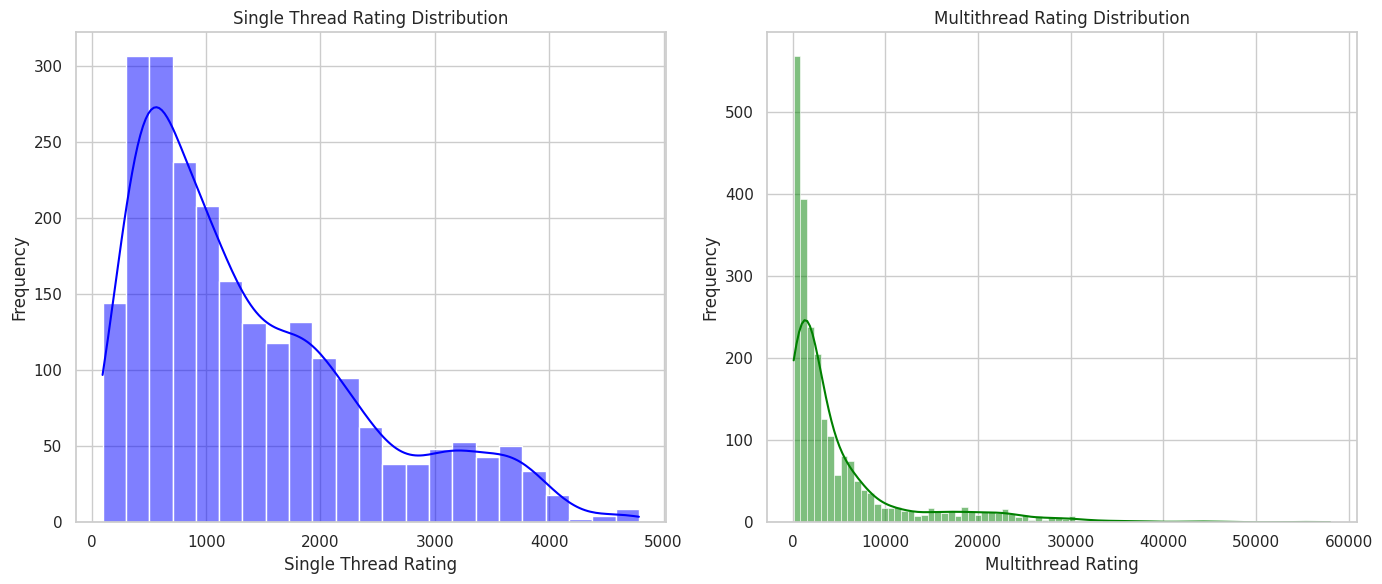

In [10]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot single_thread_rating distribution
sns.histplot(cpu_data['single_thread_rating'], ax=axes[0], color='blue', kde=True)
axes[0].set_title("Single Thread Rating Distribution")
axes[0].set_xlabel('Single Thread Rating')
axes[0].set_ylabel('Frequency')

# Plot multithread_rating distribution
sns.histplot(cpu_data['multithread_rating'], ax=axes[1], color='green', kde=True)
axes[1].set_title("Multithread Rating Distribution")
axes[1].set_xlabel('Multithread Rating')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
# Generate statistics for single_thread_rating
single_thread_stats = cpu_data['single_thread_rating'].describe()
print("Single Thread Rating Statistics:")
print(single_thread_stats)

# Generate statistics for multithread_rating
multithread_stats = cpu_data['multithread_rating'].describe()
print("\nMultithread Rating Statistics:")
print(multithread_stats)

Single Thread Rating Statistics:
count    2346.000000
mean     1393.645354
std      1014.524862
min        95.000000
25%       572.500000
50%      1087.500000
75%      1945.000000
max      4785.000000
Name: single_thread_rating, dtype: float64

Multithread Rating Statistics:
count     2346.000000
mean      5052.590793
std       7324.056972
min         93.000000
25%        842.250000
50%       2171.500000
75%       5708.000000
max      58008.000000
Name: multithread_rating, dtype: float64


##### Single vs Multithreaded

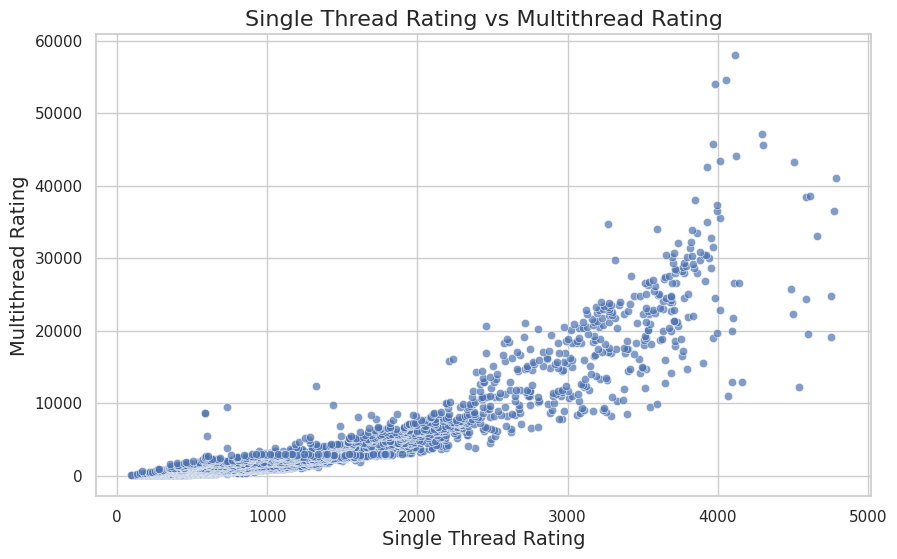

The correlation between single_thread_rating and multithread_rating is: 0.88


In [12]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cpu_data, x='single_thread_rating', y='multithread_rating', alpha=0.7)

# Add titles and labels
plt.title("Single Thread Rating vs Multithread Rating", fontsize=16)
plt.xlabel("Single Thread Rating", fontsize=14)
plt.ylabel("Multithread Rating", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = cpu_data['single_thread_rating'].corr(cpu_data['multithread_rating'])
print(f"The correlation between single_thread_rating and multithread_rating is: {correlation:.2f}")

#### Clockspeed metrics

Features:
- `performance_clockspeed`, `performance_turbospeed`
- `efficient_clockspeed`, `efficient_turbospeed`

##### Distribution

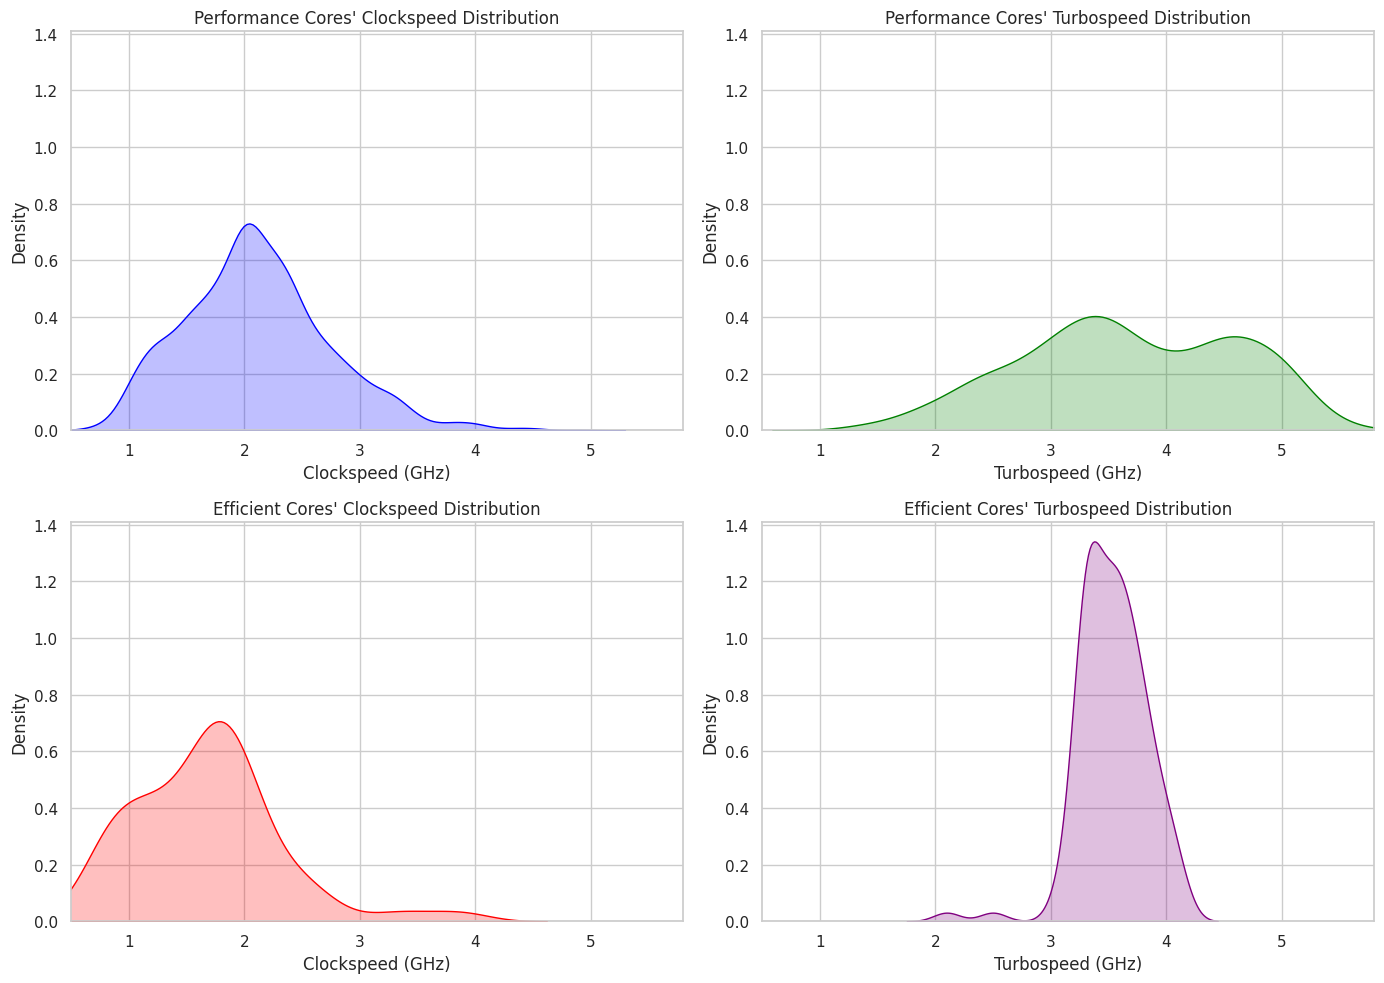

In [13]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot performance clockspeed
sns.kdeplot(cpu_data['performance_clockspeed'].dropna(), ax=axes[0, 0], color='blue', fill=True)
axes[0, 0].set_title("Performance Cores' Clockspeed Distribution")
axes[0, 0].set_xlabel('Clockspeed (GHz)')
axes[0, 0].set_ylabel('Density')

# Plot performance turbospeed
sns.kdeplot(cpu_data['performance_turbospeed'].dropna(), ax=axes[0, 1], color='green', fill=True)
axes[0, 1].set_title("Performance Cores' Turbospeed Distribution")
axes[0, 1].set_xlabel('Turbospeed (GHz)')
axes[0, 1].set_ylabel('Density')

# Plot efficient clockspeed
sns.kdeplot(cpu_data['efficient_clockspeed'].dropna(), ax=axes[1, 0], color='red', fill=True)
axes[1, 0].set_title("Efficient Cores' Clockspeed Distribution")
axes[1, 0].set_xlabel('Clockspeed (GHz)')
axes[1, 0].set_ylabel('Density')

# Plot efficient turbospeed
sns.kdeplot(cpu_data['efficient_turbospeed'].dropna(), ax=axes[1, 1], color='purple', fill=True)
axes[1, 1].set_title("Efficient Cores' Turbospeed Distribution")
axes[1, 1].set_xlabel('Turbospeed (GHz)')
axes[1, 1].set_ylabel('Density')

# Determine common x and y limits for all plots
x_min = min(
    cpu_data['performance_clockspeed'].min(),
    cpu_data['performance_turbospeed'].min(),
    cpu_data['efficient_clockspeed'].min(),
    cpu_data['efficient_turbospeed'].min(),
)

x_max = max(
    cpu_data['performance_clockspeed'].max(),
    cpu_data['performance_turbospeed'].max(),
    cpu_data['efficient_clockspeed'].max(),
    cpu_data['efficient_turbospeed'].max(),
)

y_max = max(ax.get_ylim()[1] for ax in axes.flat)  # Find the maximum y limit among all plots

# Set common limits
for ax in axes.flat:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


##### Correlation with Performance

In [14]:
# Calculate correlations
correlation_performance_single = cpu_data['performance_clockspeed'].corr(cpu_data['single_thread_rating'])
correlation_performance_multi = cpu_data['performance_clockspeed'].corr(cpu_data['multithread_rating'])
correlation_efficient_single = cpu_data['efficient_clockspeed'].corr(cpu_data['single_thread_rating'])
correlation_efficient_multi = cpu_data['efficient_clockspeed'].corr(cpu_data['multithread_rating'])

# Print the results
print(f"Correlation between performance_clockspeed and single_thread_rating: {correlation_performance_single:.2f}")
print(f"Correlation between performance_clockspeed and multithread_rating: {correlation_performance_multi:.2f}")
print(f"Correlation between efficient_clockspeed and single_thread_rating: {correlation_efficient_single:.2f}")
print(f"Correlation between efficient_clockspeed and multithread_rating: {correlation_efficient_multi:.2f}")

Correlation between performance_clockspeed and single_thread_rating: 0.60
Correlation between performance_clockspeed and multithread_rating: 0.48
Correlation between efficient_clockspeed and single_thread_rating: 0.20
Correlation between efficient_clockspeed and multithread_rating: 0.14


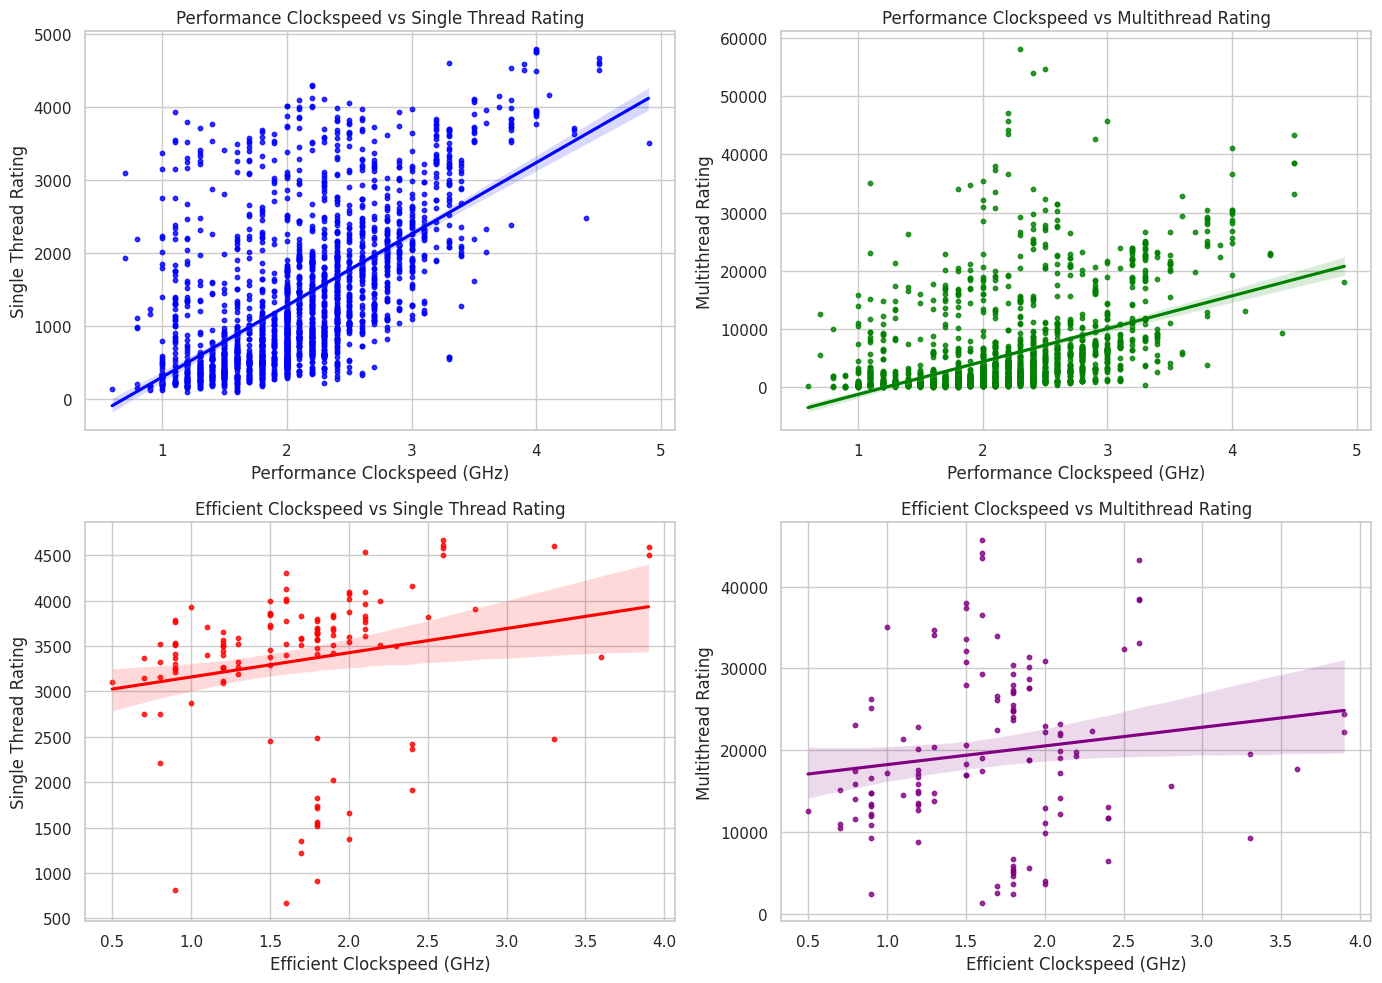

In [15]:
# Clone the cpu_data DataFrame
cpu_data_clone = cpu_data.copy()

# Ensure columns are numeric
cpu_data_clone['performance_clockspeed'] = pd.to_numeric(cpu_data_clone['performance_clockspeed'], errors='coerce')
cpu_data_clone['efficient_clockspeed'] = pd.to_numeric(cpu_data_clone['efficient_clockspeed'], errors='coerce')
cpu_data_clone['single_thread_rating'] = pd.to_numeric(cpu_data_clone['single_thread_rating'], errors='coerce')
cpu_data_clone['multithread_rating'] = pd.to_numeric(cpu_data_clone['multithread_rating'], errors='coerce')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot performance_clockspeed vs single_thread_rating with regression line
sns.regplot(data=cpu_data_clone, x='performance_clockspeed', y='single_thread_rating', ax=axes[0, 0], color='blue', scatter_kws={'s': 10})
axes[0, 0].set_title('Performance Clockspeed vs Single Thread Rating')
axes[0, 0].set_xlabel('Performance Clockspeed (GHz)')
axes[0, 0].set_ylabel('Single Thread Rating')

# Plot performance_clockspeed vs multithread_rating with regression line
sns.regplot(data=cpu_data_clone, x='performance_clockspeed', y='multithread_rating', ax=axes[0, 1], color='green', scatter_kws={'s': 10})
axes[0, 1].set_title('Performance Clockspeed vs Multithread Rating')
axes[0, 1].set_xlabel('Performance Clockspeed (GHz)')
axes[0, 1].set_ylabel('Multithread Rating')

# Plot efficient_clockspeed vs single_thread_rating with regression line
sns.regplot(data=cpu_data_clone, x='efficient_clockspeed', y='single_thread_rating', ax=axes[1, 0], color='red', scatter_kws={'s': 10})
axes[1, 0].set_title('Efficient Clockspeed vs Single Thread Rating')
axes[1, 0].set_xlabel('Efficient Clockspeed (GHz)')
axes[1, 0].set_ylabel('Single Thread Rating')

# Plot efficient_clockspeed vs multithread_rating with regression line
sns.regplot(data=cpu_data_clone, x='efficient_clockspeed', y='multithread_rating', ax=axes[1, 1], color='purple', scatter_kws={'s': 10})
axes[1, 1].set_title('Efficient Clockspeed vs Multithread Rating')
axes[1, 1].set_xlabel('Efficient Clockspeed (GHz)')
axes[1, 1].set_ylabel('Multithread Rating')

plt.tight_layout()
plt.show()

##### Boost impact

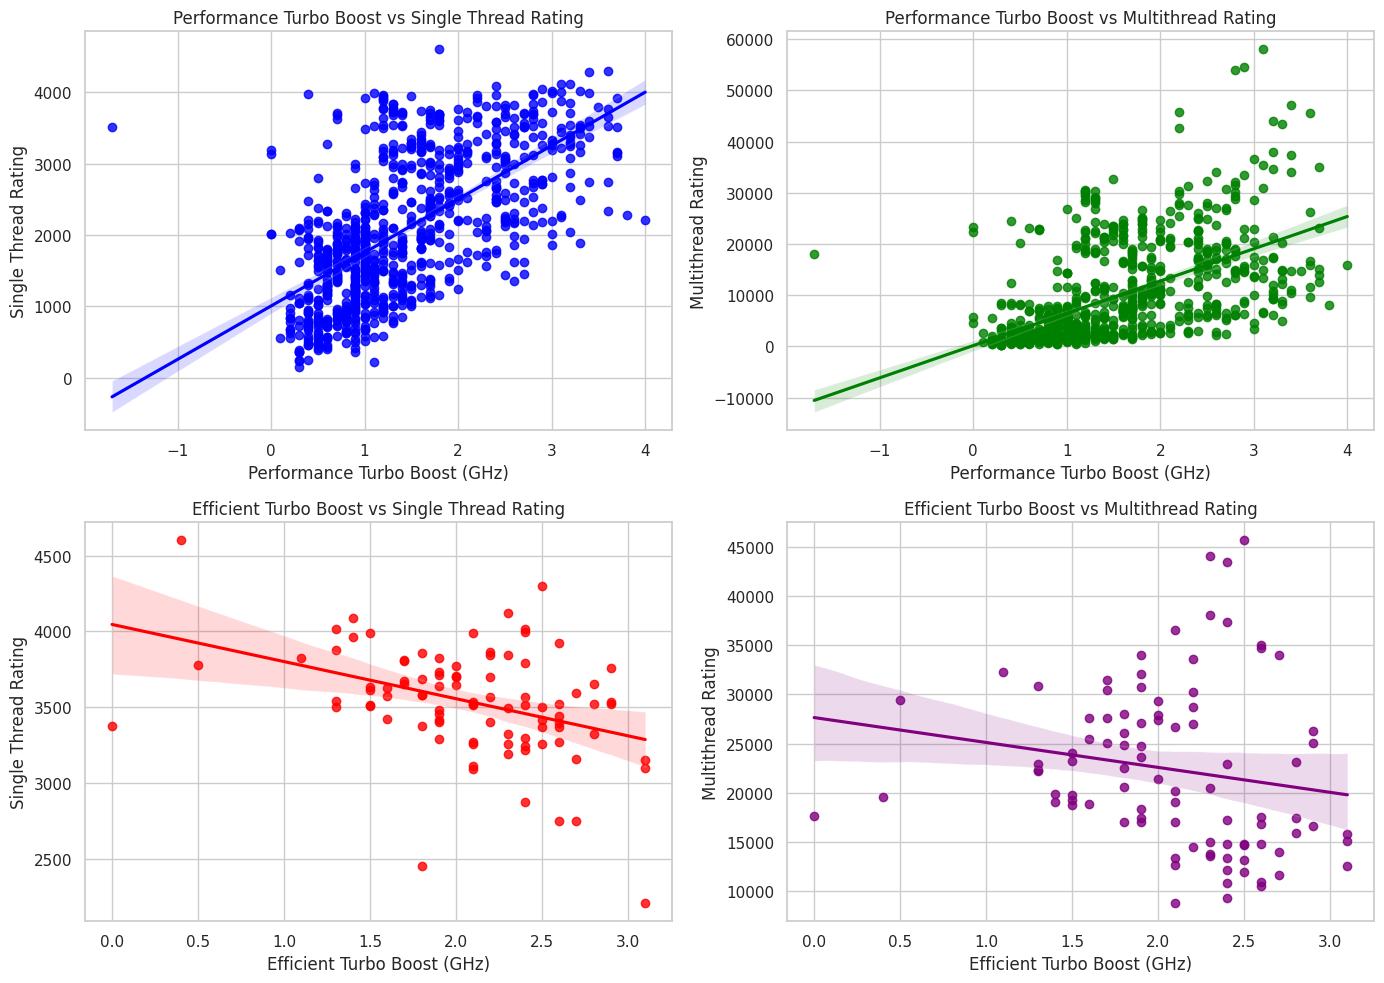

In [16]:
# Clone the cpu_data DataFrame
cpu_data_clone = cpu_data.copy()

# Convert columns to numeric, forcing errors to NaN
cpu_data_clone['performance_turbospeed'] = pd.to_numeric(cpu_data_clone['performance_turbospeed'], errors='coerce')
cpu_data_clone['performance_clockspeed'] = pd.to_numeric(cpu_data_clone['performance_clockspeed'], errors='coerce')
cpu_data_clone['efficient_turbospeed'] = pd.to_numeric(cpu_data_clone['efficient_turbospeed'], errors='coerce')
cpu_data_clone['efficient_clockspeed'] = pd.to_numeric(cpu_data_clone['efficient_clockspeed'], errors='coerce')

# Compute turbo boost margins
cpu_data_clone['performance_turbo_boost'] = cpu_data_clone['performance_turbospeed'] - cpu_data_clone['performance_clockspeed']
cpu_data_clone['efficient_turbo_boost'] = cpu_data_clone['efficient_turbospeed'] - cpu_data_clone['efficient_clockspeed']

# Analyze turbo boost impact on single_thread_rating and multithread_rating
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Performance turbo boost vs single_thread_rating
sns.regplot(data=cpu_data_clone, x='performance_turbo_boost', y='single_thread_rating', ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Performance Turbo Boost vs Single Thread Rating')
axes[0, 0].set_xlabel('Performance Turbo Boost (GHz)')
axes[0, 0].set_ylabel('Single Thread Rating')

# Performance turbo boost vs multithread_rating
sns.regplot(data=cpu_data_clone, x='performance_turbo_boost', y='multithread_rating', ax=axes[0, 1], color='green')
axes[0, 1].set_title('Performance Turbo Boost vs Multithread Rating')
axes[0, 1].set_xlabel('Performance Turbo Boost (GHz)')
axes[0, 1].set_ylabel('Multithread Rating')

# Efficient turbo boost vs single_thread_rating
sns.regplot(data=cpu_data_clone, x='efficient_turbo_boost', y='single_thread_rating', ax=axes[1, 0], color='red')
axes[1, 0].set_title('Efficient Turbo Boost vs Single Thread Rating')
axes[1, 0].set_xlabel('Efficient Turbo Boost (GHz)')
axes[1, 0].set_ylabel('Single Thread Rating')

# Efficient turbo boost vs multithread_rating
sns.regplot(data=cpu_data_clone, x='efficient_turbo_boost', y='multithread_rating', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Efficient Turbo Boost vs Multithread Rating')
axes[1, 1].set_xlabel('Efficient Turbo Boost (GHz)')
axes[1, 1].set_ylabel('Multithread Rating')

plt.tight_layout()
plt.show()

#### Core & Thread Analysis

Features:
- `performance_cores`, `performance_threads`
- `efficient_cores`, `efficient_threads`

##### Distribution

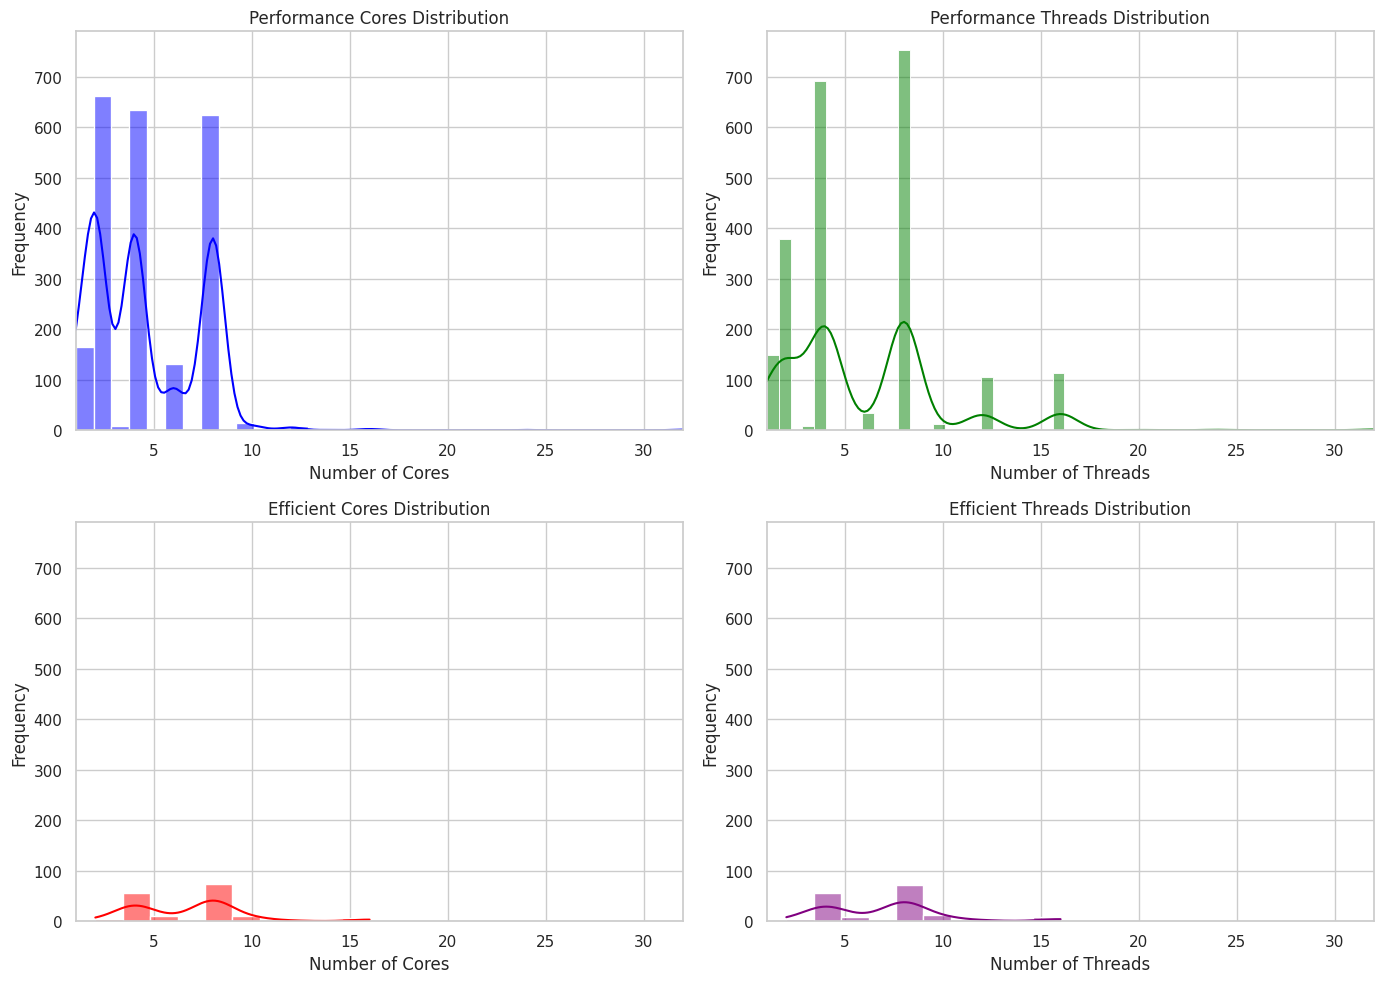

In [17]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot performance cores
sns.histplot(cpu_data['performance_cores'].dropna(), ax=axes[0, 0], color='blue', kde=True)
axes[0, 0].set_title("Performance Cores Distribution")
axes[0, 0].set_xlabel('Number of Cores')
axes[0, 0].set_ylabel('Frequency')

# Plot performance threads
sns.histplot(cpu_data['performance_threads'].dropna(), ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title("Performance Threads Distribution")
axes[0, 1].set_xlabel('Number of Threads')
axes[0, 1].set_ylabel('Frequency')

# Plot efficient cores
sns.histplot(cpu_data['efficient_cores'].dropna(), ax=axes[1, 0], color='red', kde=True)
axes[1, 0].set_title("Efficient Cores Distribution")
axes[1, 0].set_xlabel('Number of Cores')
axes[1, 0].set_ylabel('Frequency')

# Plot efficient threads
sns.histplot(cpu_data['efficient_threads'].dropna(), ax=axes[1, 1], color='purple', kde=True)
axes[1, 1].set_title("Efficient Threads Distribution")
axes[1, 1].set_xlabel('Number of Threads')
axes[1, 1].set_ylabel('Frequency')

# Determine common x and y limits for all plots
x_min = min(
    cpu_data['performance_cores'].min(),
    cpu_data['performance_threads'].min(),
    cpu_data['efficient_cores'].min(),
    cpu_data['efficient_threads'].min(),
)

x_max = max(
    cpu_data['performance_cores'].max(),
    cpu_data['performance_threads'].max(),
    cpu_data['efficient_cores'].max(),
    cpu_data['efficient_threads'].max(),
)

y_max = max(ax.get_ylim()[1] for ax in axes.flat)  # Get the maximum y-limit among all plots

# Set common x and y limits for all subplots
for ax in axes.flat:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [18]:
# Clone the cpu_data DataFrame
cpu_data_clone = cpu_data.copy()

# Calculate core/thread ratio for performance and efficient cores
cpu_data_clone['performance_core_thread_ratio'] = cpu_data_clone['performance_cores'] / cpu_data_clone['performance_threads']
cpu_data_clone['efficient_core_thread_ratio'] = cpu_data_clone['efficient_cores'] / cpu_data_clone['efficient_threads']

# Calculate frequency counts for each ratio
performance_ratio_counts = cpu_data_clone['performance_core_thread_ratio'].value_counts().sort_index()
efficient_ratio_counts = cpu_data_clone['efficient_core_thread_ratio'].value_counts().sort_index()

# Print the frequency of core/thread ratios
print("Performance Core/Thread Ratio Frequencies:")
print(performance_ratio_counts)

print("\nEfficient Core/Thread Ratio Frequencies:")
print(efficient_ratio_counts)

Performance Core/Thread Ratio Frequencies:
performance_core_thread_ratio
0.5     773
1.0    1484
Name: count, dtype: int64

Efficient Core/Thread Ratio Frequencies:
efficient_core_thread_ratio
0.5      4
1.0    158
Name: count, dtype: int64


##### Multi-threading impact

In [19]:
# Calculate correlations
correlation_performance_cores = cpu_data['performance_cores'].corr(cpu_data['multithread_rating'])
correlation_performance_threads = cpu_data['performance_threads'].corr(cpu_data['multithread_rating'])
correlation_efficient_cores = cpu_data['efficient_cores'].corr(cpu_data['multithread_rating'])
correlation_efficient_threads = cpu_data['efficient_threads'].corr(cpu_data['multithread_rating'])

# Print the results
print(f"Correlation between performance_cores and multithread_rating: {correlation_performance_cores:.2f}")
print(f"Correlation between performance_threads and multithread_rating: {correlation_performance_threads:.2f}")
print(f"Correlation between efficient_cores and multithread_rating: {correlation_efficient_cores:.2f}")
print(f"Correlation between efficient_threads and multithread_rating: {correlation_efficient_threads:.2f}")

Correlation between performance_cores and multithread_rating: 0.41
Correlation between performance_threads and multithread_rating: 0.74
Correlation between efficient_cores and multithread_rating: 0.47
Correlation between efficient_threads and multithread_rating: 0.50


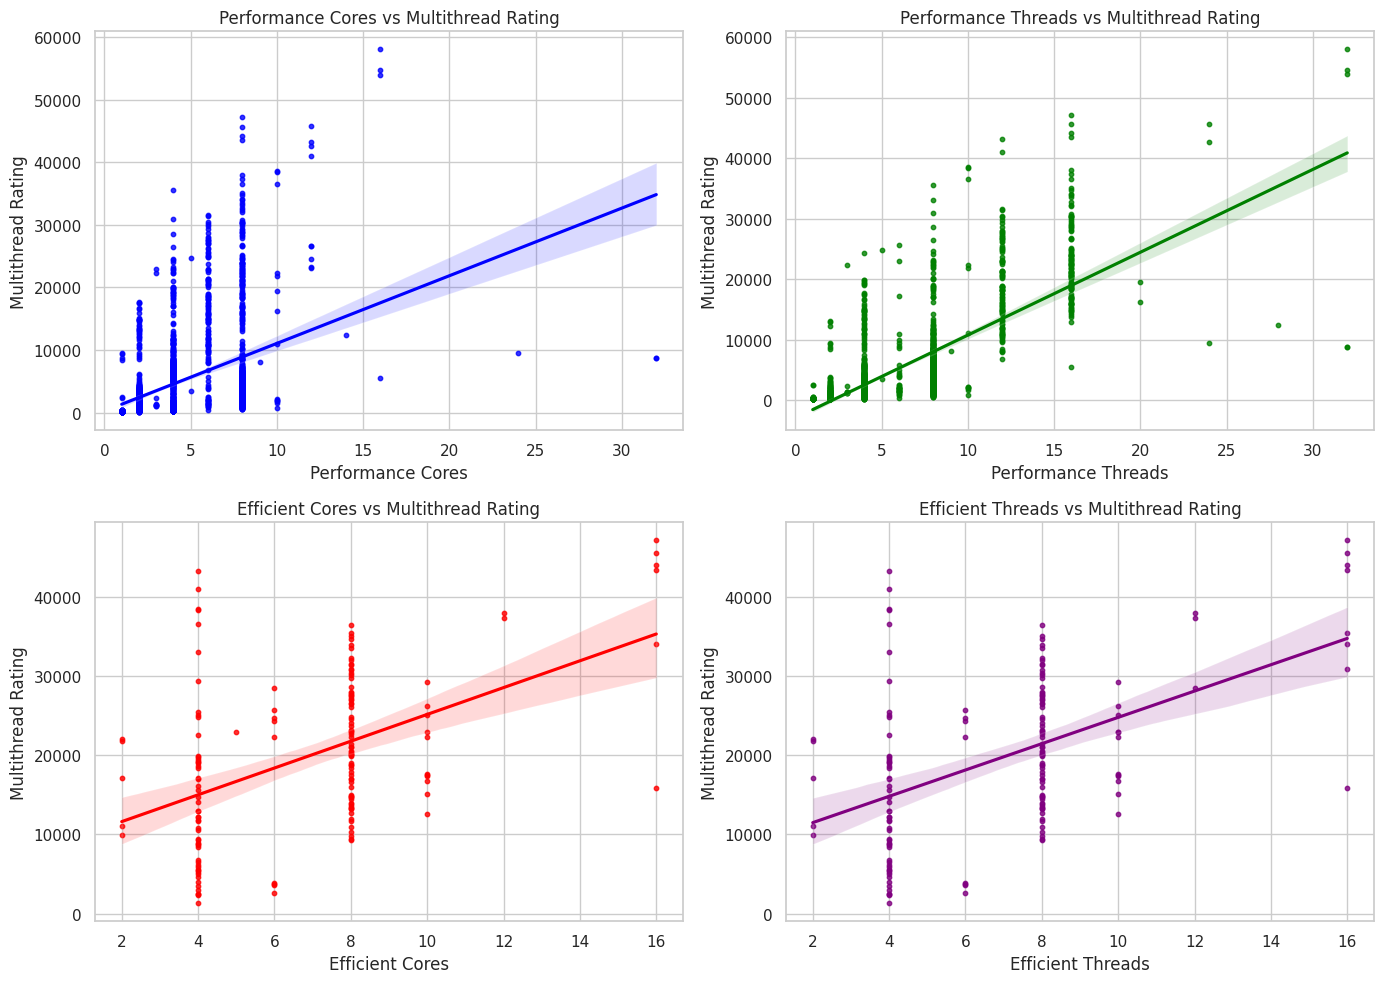

In [20]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot performance_cores vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='performance_cores', y='multithread_rating', ax=axes[0, 0], color='blue', scatter_kws={'s': 10})
axes[0, 0].set_title('Performance Cores vs Multithread Rating')
axes[0, 0].set_xlabel('Performance Cores')
axes[0, 0].set_ylabel('Multithread Rating')

# Plot performance_threads vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='performance_threads', y='multithread_rating', ax=axes[0, 1], color='green', scatter_kws={'s': 10})
axes[0, 1].set_title('Performance Threads vs Multithread Rating')
axes[0, 1].set_xlabel('Performance Threads')
axes[0, 1].set_ylabel('Multithread Rating')

# Plot efficient_cores vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='efficient_cores', y='multithread_rating', ax=axes[1, 0], color='red', scatter_kws={'s': 10})
axes[1, 0].set_title('Efficient Cores vs Multithread Rating')
axes[1, 0].set_xlabel('Efficient Cores')
axes[1, 0].set_ylabel('Multithread Rating')

# Plot efficient_threads vs multithread_rating with regression line
sns.regplot(data=cpu_data, x='efficient_threads', y='multithread_rating', ax=axes[1, 1], color='purple', scatter_kws={'s': 10})
axes[1, 1].set_title('Efficient Threads vs Multithread Rating')
axes[1, 1].set_xlabel('Efficient Threads')
axes[1, 1].set_ylabel('Multithread Rating')

plt.tight_layout()
plt.show()

#### Power Consumption (TDP)

Features:
- `TDP`

##### TDP vs Performance

In [21]:
# Clone the cpu_data DataFrame
cpu_data_clone = cpu_data.copy()

# Ensure 'tdp' column is numeric
cpu_data_clone['tdp'] = pd.to_numeric(cpu_data_clone['tdp'], errors='coerce')

# Calculate correlations
correlation_tdp_single = cpu_data_clone['tdp'].corr(cpu_data_clone['single_thread_rating'])
correlation_tdp_multi = cpu_data_clone['tdp'].corr(cpu_data_clone['multithread_rating'])

# Print the results
print(f"Correlation between TDP and single_thread_rating: {correlation_tdp_single:.2f}")
print(f"Correlation between TDP and multithread_rating: {correlation_tdp_multi:.2f}")

Correlation between TDP and single_thread_rating: 0.39
Correlation between TDP and multithread_rating: 0.43


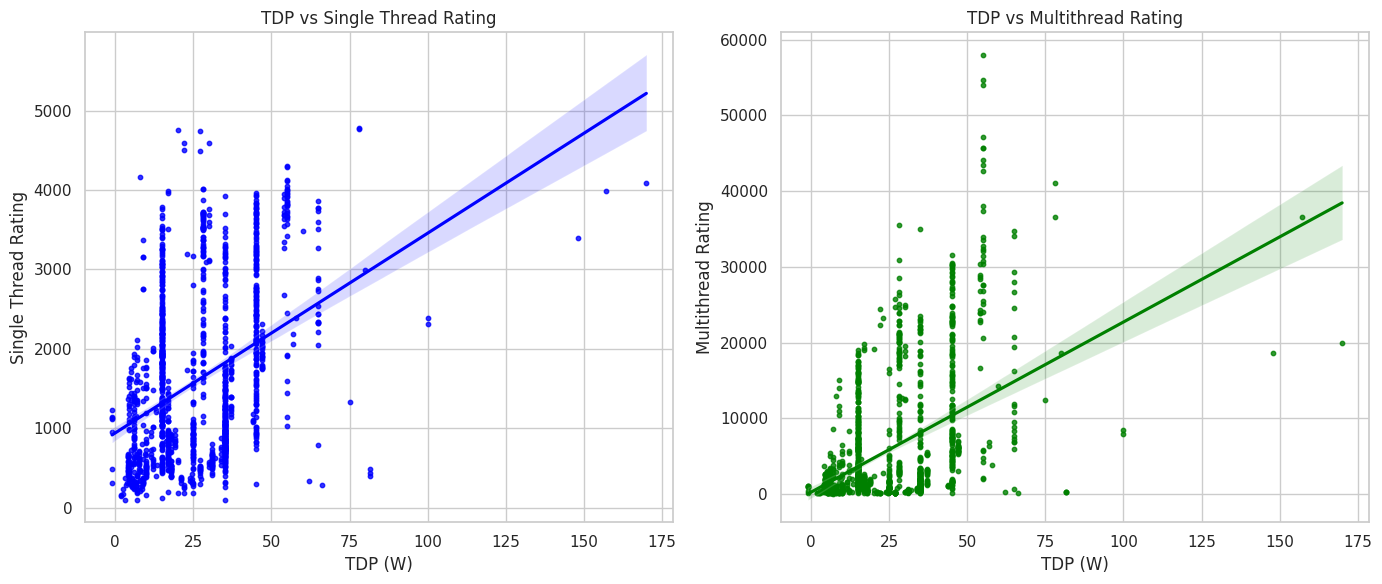

In [22]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot TDP vs single_thread_rating with regression line
sns.regplot(data=cpu_data_clone, x='tdp', y='single_thread_rating', ax=axes[0], color='blue', scatter_kws={'s': 10})
axes[0].set_title('TDP vs Single Thread Rating')
axes[0].set_xlabel('TDP (W)')
axes[0].set_ylabel('Single Thread Rating')

# Plot TDP vs multithread_rating with regression line
sns.regplot(data=cpu_data_clone, x='tdp', y='multithread_rating', ax=axes[1], color='green', scatter_kws={'s': 10})
axes[1].set_title('TDP vs Multithread Rating')
axes[1].set_xlabel('TDP (W)')
axes[1].set_ylabel('Multithread Rating')

plt.tight_layout()
plt.show()

##### Efficiency Analysis

Top 5 rows:
                         name  multithread_rating   tdp  \
2113  intel core ultra 7 164u               15106   9.0   
2081            apple a18 pro               13020   8.0   
2090      intel core i7 1260u               14001   9.0   
2052      intel core i7 1250u               11654   9.0   
2331    amd ryzen ai 9 hx 370               35501  28.0   

      performance_efficiency  
2113             1678.444444  
2081             1627.500000  
2090             1555.666667  
2052             1294.888889  
2331             1267.892857  

Bottom 5 rows:
                             name  multithread_rating   tdp  \
70   mobile amd athlon xp-m 1800+                 193  45.0   
187    mobile amd athlon 64 3400+                 333  81.5   
181    mobile amd athlon 64 3200+                 326  81.5   
6              intel celeron b710                 106  35.0   
16   mobile intel celeron 1.80ghz                 121  66.1   

     performance_efficiency  
70                 4.2

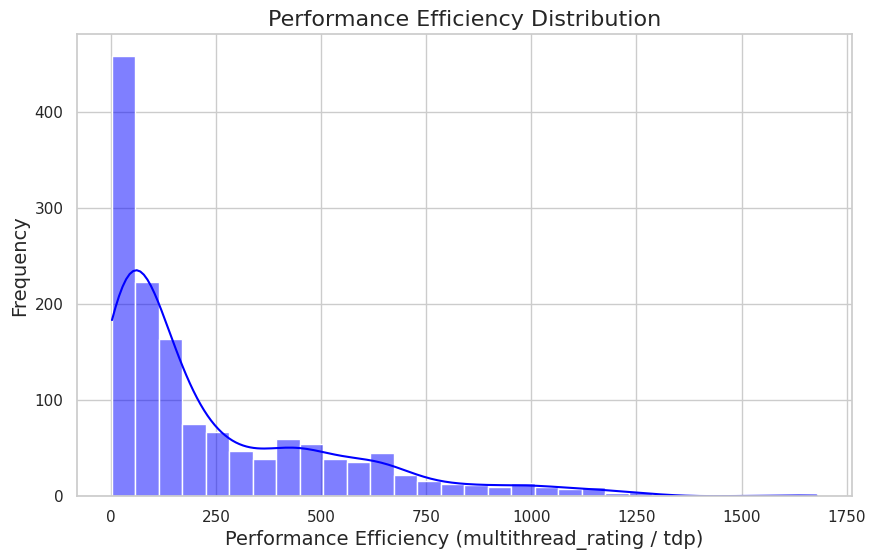

In [23]:
# Clone the cpu_data DataFrame
cpu_data_clone = cpu_data.copy()

# Ensure 'tdp' column is numeric
cpu_data_clone['tdp'] = pd.to_numeric(cpu_data_clone['tdp'], errors='coerce')

# Calculate performance efficiency
cpu_data_clone['performance_efficiency'] = cpu_data_clone['multithread_rating'] / cpu_data_clone['tdp']

# Drop rows with NaN values in 'performance_efficiency'
cpu_data_clone = cpu_data_clone.dropna(subset=['performance_efficiency'])

# Filter out rows where 'performance_efficiency' is less than or equal to 0
cpu_data_clone = cpu_data_clone[cpu_data_clone['performance_efficiency'] > 0]

# Sort the DataFrame by 'performance_efficiency'
cpu_data_clone = cpu_data_clone.sort_values(by='performance_efficiency', ascending=False)

# Display the top 5 rows of the updated DataFrame
print("Top 5 rows:")
print(cpu_data_clone[['name', 'multithread_rating', 'tdp', 'performance_efficiency']].head())

# Display the bottom 5 rows of the updated DataFrame
print("\nBottom 5 rows:")
print(cpu_data_clone[['name', 'multithread_rating', 'tdp', 'performance_efficiency']].tail())

# Plot the distribution of performance efficiency
plt.figure(figsize=(10, 6))
sns.histplot(cpu_data_clone['performance_efficiency'], kde=True, color="blue", bins=30)
plt.title("Performance Efficiency Distribution", fontsize=16)
plt.xlabel("Performance Efficiency (multithread_rating / tdp)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

## GPU Dataframe

### Preview the data

#### Dataframe head

In [24]:
# Display the first few rows
print(gpu_data.head())

                      name  avg_g3d_mark bus_interface  max_memory_size  \
0  rtx 2000 ada generation         15223          None              NaN   
1                rtx a4000         15394  pcie 4.0 x16          16384.0   
2          radeon rx 6800s         15436   pcie 4.0 x8           8192.0   
3         geforce rtx 3070         15439  pcie 4.0 x16           8192.0   
4        geforce gtx 675mx          2717  pcie 3.0 x16           4096.0   

   core_clock max_direct open_gl  max_tdp  test_directx_9  test_directx_10  \
0         NaN       None    None      NaN           195.0             90.0   
1       735.0       12_2     4.6    140.0           160.0            112.0   
2      1800.0         12     4.6    100.0           188.0             90.0   
3      1100.0         12     4.6    115.0           159.0            115.0   
4       667.0         11     4.5    100.0            59.0             13.0   

   test_directx_11  test_directx_12  test_gpu_compute  
0            130.0      

#### Dataframe tail

In [25]:
# Display the last few rows
print(gpu_data.tail())

                        name  avg_g3d_mark bus_interface  max_memory_size  \
613          radeon rx 7900m         22752          None              NaN   
614  rtx 4000 ada generation         22879          None              NaN   
615  rtx 5000 ada generation         24197          None              NaN   
616         geforce rtx 4080         25099  pcie 4.0 x16          12288.0   
617         geforce rtx 4090         27668  pcie 4.0 x16          16384.0   

     core_clock max_direct open_gl  max_tdp  test_directx_9  test_directx_10  \
613         NaN       None    None      NaN           267.0            127.0   
614         NaN       None    None      NaN           270.0            139.0   
615         NaN       None    None      NaN           274.0            154.0   
616      1860.0       12_2     4.6    150.0           286.0            161.0   
617      1455.0       12_2     4.6    150.0           314.0            181.0   

     test_directx_11  test_directx_12  test_gpu_compute 

#### Check all the features

In [26]:
print(gpu_data.columns)

Index(['name', 'avg_g3d_mark', 'bus_interface', 'max_memory_size',
       'core_clock', 'max_direct', 'open_gl', 'max_tdp', 'test_directx_9',
       'test_directx_10', 'test_directx_11', 'test_directx_12',
       'test_gpu_compute'],
      dtype='object')


#### Check the data types and non-null counts

In [27]:
print(gpu_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              618 non-null    object 
 1   avg_g3d_mark      618 non-null    int64  
 2   bus_interface     349 non-null    object 
 3   max_memory_size   342 non-null    float64
 4   core_clock        309 non-null    float64
 5   max_direct        353 non-null    object 
 6   open_gl           346 non-null    object 
 7   max_tdp           245 non-null    float64
 8   test_directx_9    340 non-null    float64
 9   test_directx_10   340 non-null    float64
 10  test_directx_11   340 non-null    float64
 11  test_directx_12   340 non-null    float64
 12  test_gpu_compute  340 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 62.9+ KB
None


#### Look at descriptive statistics

In [28]:
print(gpu_data.describe())

       avg_g3d_mark  max_memory_size   core_clock     max_tdp  test_directx_9  \
count    618.000000       342.000000   309.000000  245.000000      340.000000   
mean    2794.695793      2852.590643   756.132686   58.142857       65.000000   
std     4641.351905      3298.820120   366.364012   38.361524       67.759944   
min        2.000000         2.000000   143.000000    7.000000        1.000000   
25%      358.000000       512.000000   500.000000   25.000000       11.000000   
50%      671.500000      2048.000000   660.000000   50.000000       36.000000   
75%     2697.000000      4096.000000   954.000000   80.000000      108.250000   
max    27668.000000     16384.000000  2321.000000  165.000000      314.000000   

       test_directx_10  test_directx_11  test_directx_12  test_gpu_compute  
count       340.000000       340.000000       340.000000        340.000000  
mean         26.820588        38.591176        19.605882       1900.920588  
std          37.466998        51.947789

### Feature Analysis

#### Clock Speed Analysis

Features:
- `core_clock`

##### Distribution

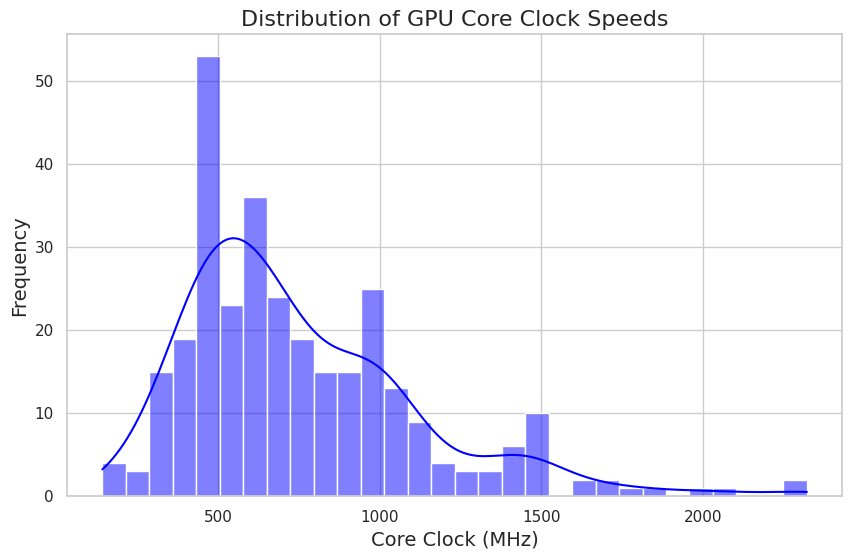

In [29]:
# Plot the distribution of core_clock
plt.figure(figsize=(10, 6))
sns.histplot(gpu_data['core_clock'].dropna(), kde=True, color='blue', bins=30)

# Add labels and title
plt.title("Distribution of GPU Core Clock Speeds", fontsize=16)
plt.xlabel("Core Clock (MHz)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

##### Impact on Performance

Correlation between core_clock and avg_g3d_mark: 0.71
Correlation between core_clock and test_directx_9: 0.70
Correlation between core_clock and test_directx_10: 0.63
Correlation between core_clock and test_directx_11: 0.68
Correlation between core_clock and test_directx_12: 0.69
Correlation between core_clock and test_gpu_compute: 0.68


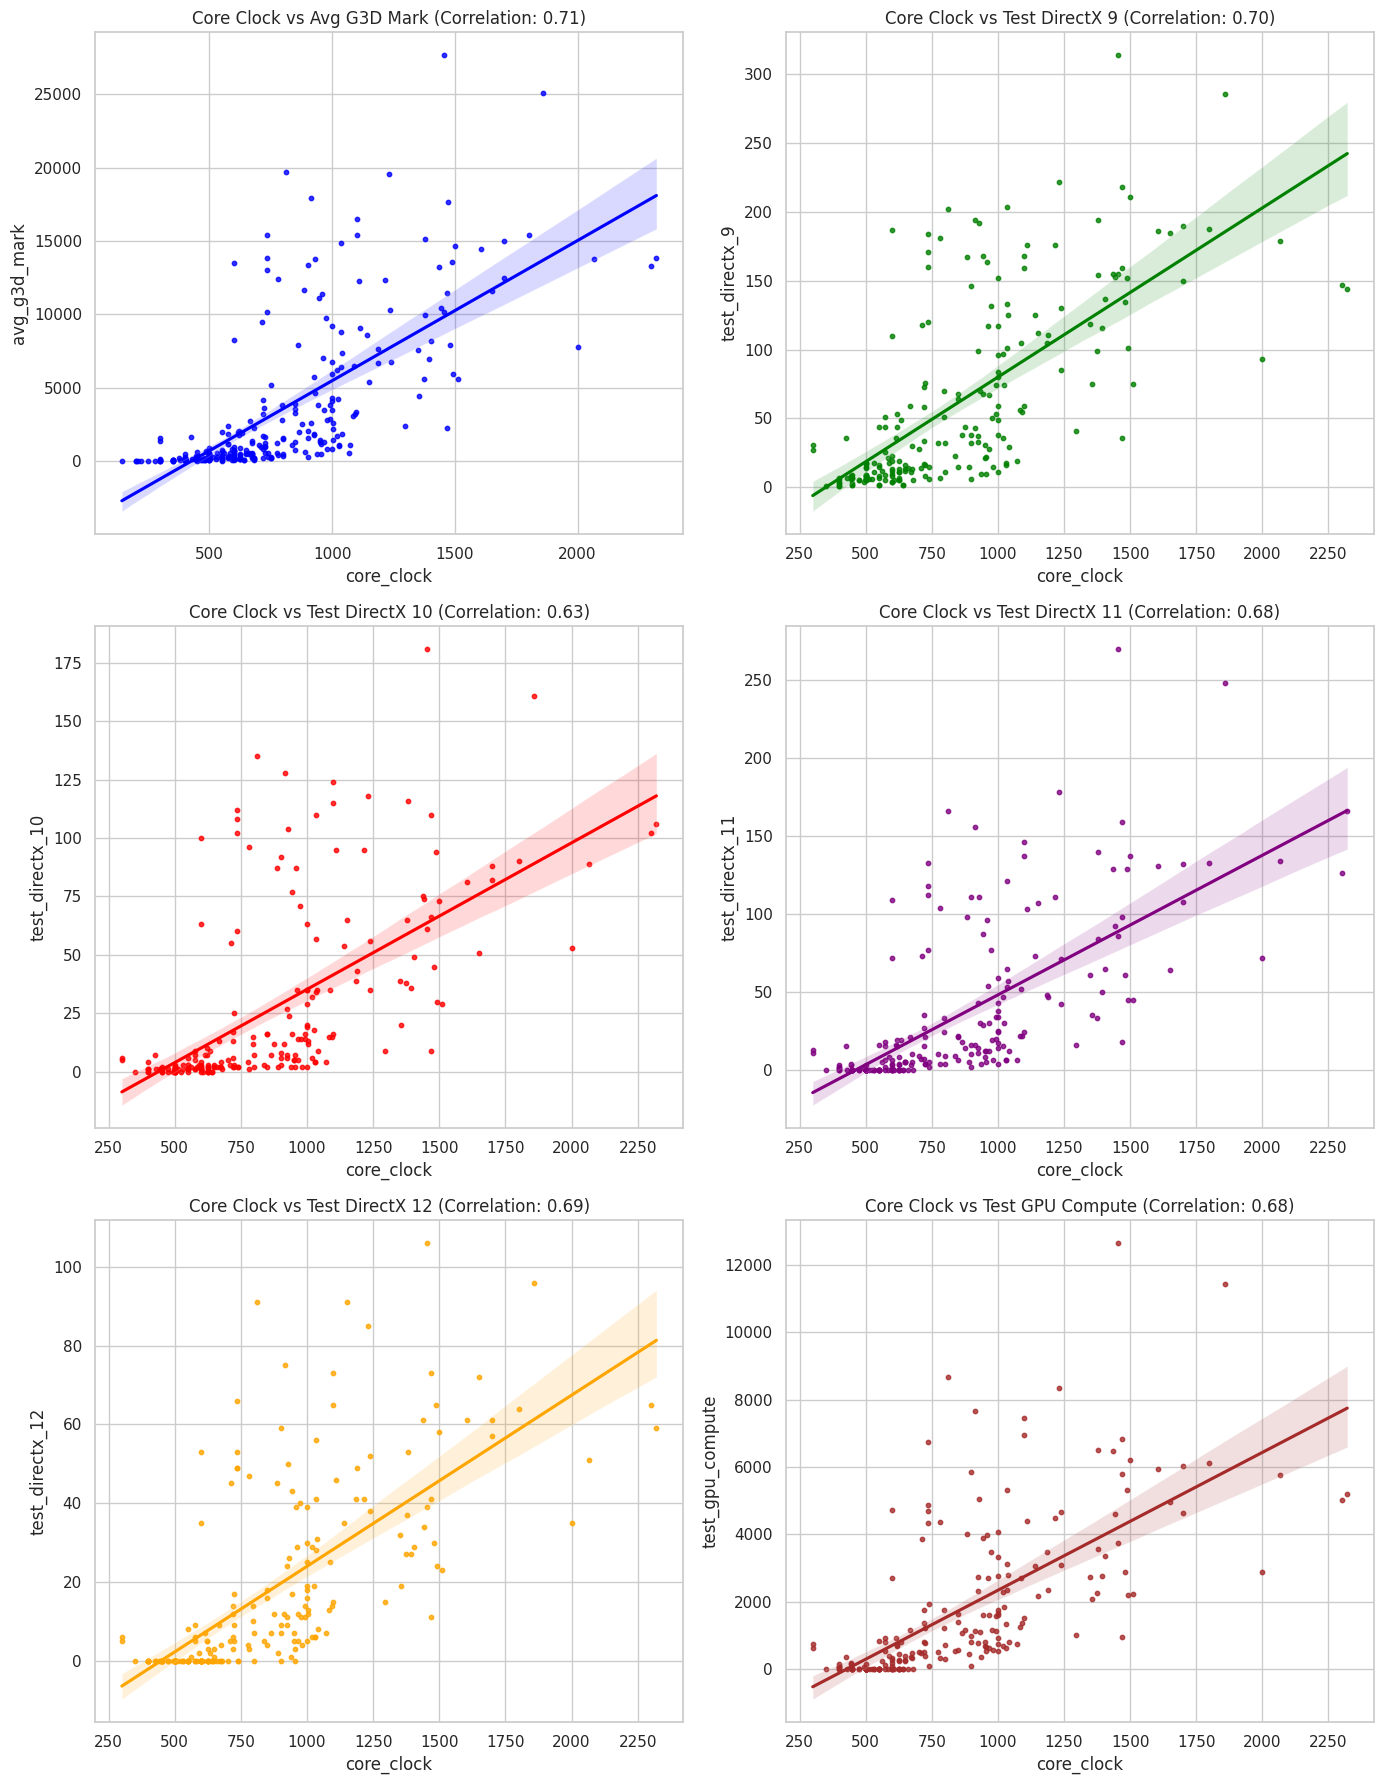

In [30]:
# Calculate correlation coefficients
correlation_core_clock_avg_g3d_mark = gpu_data['core_clock'].corr(gpu_data['avg_g3d_mark'])
correlation_core_clock_test_directx_9 = gpu_data['core_clock'].corr(gpu_data['test_directx_9'])
correlation_core_clock_test_directx_10 = gpu_data['core_clock'].corr(gpu_data['test_directx_10'])
correlation_core_clock_test_directx_11 = gpu_data['core_clock'].corr(gpu_data['test_directx_11'])
correlation_core_clock_test_directx_12 = gpu_data['core_clock'].corr(gpu_data['test_directx_12'])
correlation_core_clock_test_gpu_compute = gpu_data['core_clock'].corr(gpu_data['test_gpu_compute'])

# Print correlation coefficients
print(f"Correlation between core_clock and avg_g3d_mark: {correlation_core_clock_avg_g3d_mark:.2f}")
print(f"Correlation between core_clock and test_directx_9: {correlation_core_clock_test_directx_9:.2f}")
print(f"Correlation between core_clock and test_directx_10: {correlation_core_clock_test_directx_10:.2f}")
print(f"Correlation between core_clock and test_directx_11: {correlation_core_clock_test_directx_11:.2f}")
print(f"Correlation between core_clock and test_directx_12: {correlation_core_clock_test_directx_12:.2f}")
print(f"Correlation between core_clock and test_gpu_compute: {correlation_core_clock_test_gpu_compute:.2f}")

# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Plot core_clock vs avg_g3d_mark
sns.regplot(data=gpu_data, x='core_clock', y='avg_g3d_mark', ax=axes[0, 0], color='blue', scatter_kws={'s': 10})
axes[0, 0].set_title(f"Core Clock vs Avg G3D Mark (Correlation: {correlation_core_clock_avg_g3d_mark:.2f})")

# Plot core_clock vs test_directx_9
sns.regplot(data=gpu_data, x='core_clock', y='test_directx_9', ax=axes[0, 1], color='green', scatter_kws={'s': 10})
axes[0, 1].set_title(f"Core Clock vs Test DirectX 9 (Correlation: {correlation_core_clock_test_directx_9:.2f})")

# Plot core_clock vs test_directx_10
sns.regplot(data=gpu_data, x='core_clock', y='test_directx_10', ax=axes[1, 0], color='red', scatter_kws={'s': 10})
axes[1, 0].set_title(f"Core Clock vs Test DirectX 10 (Correlation: {correlation_core_clock_test_directx_10:.2f})")

# Plot core_clock vs test_directx_11
sns.regplot(data=gpu_data, x='core_clock', y='test_directx_11', ax=axes[1, 1], color='purple', scatter_kws={'s': 10})
axes[1, 1].set_title(f"Core Clock vs Test DirectX 11 (Correlation: {correlation_core_clock_test_directx_11:.2f})")

# Plot core_clock vs test_directx_12
sns.regplot(data=gpu_data, x='core_clock', y='test_directx_12', ax=axes[2, 0], color='orange', scatter_kws={'s': 10})
axes[2, 0].set_title(f"Core Clock vs Test DirectX 12 (Correlation: {correlation_core_clock_test_directx_12:.2f})")

# Plot core_clock vs test_gpu_compute
sns.regplot(data=gpu_data, x='core_clock', y='test_gpu_compute', ax=axes[2, 1], color='brown', scatter_kws={'s': 10})
axes[2, 1].set_title(f"Core Clock vs Test GPU Compute (Correlation: {correlation_core_clock_test_gpu_compute:.2f})")

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

#### Memory and Bandwidth Analysis

Features:
- `max_memory_size`
- `bus_interface`

##### Memory Size

Unique categories in memory_size_comparison: Index(['2–4GB', '4–8GB', '8–16GB', '<2GB'], dtype='object', name='memory_size_category')
memory_size_category
<2GB        579.054545
2–4GB      3843.720588
4–8GB     11465.523810
8–16GB    16140.750000
Name: avg_g3d_mark, dtype: float64


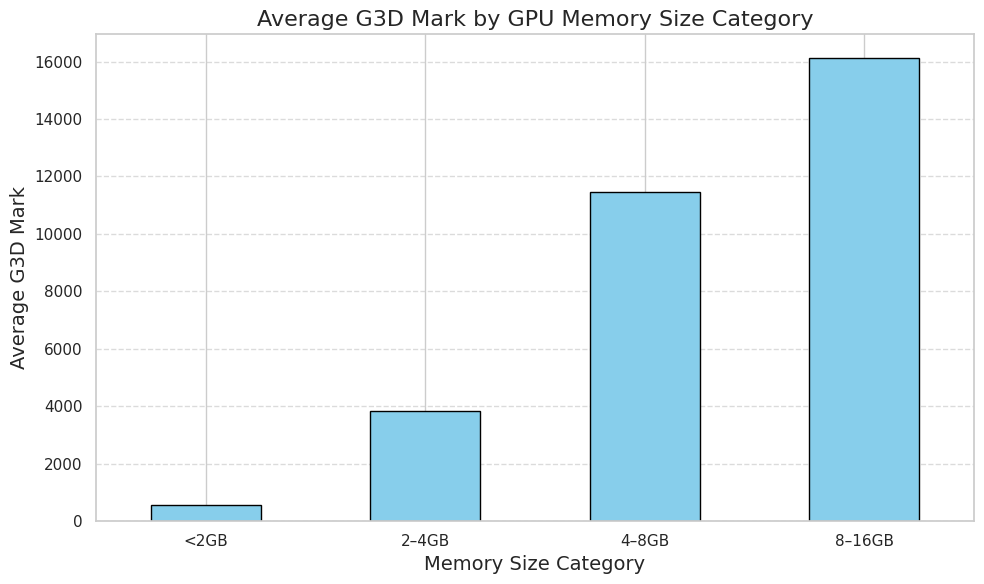

In [31]:
# Clone the gpu_data DataFrame
gpu_data_clone = gpu_data.copy()

# Define the memory size categories with handling for NaN values
def categorize_memory_size(memory_size):
    if pd.isna(memory_size):  # Check if the value is NaN
        return 'Unknown'
    elif memory_size <= 2048:
        return '<2GB'
    elif 2048 < memory_size <= 4096:
        return '2–4GB'
    elif 4096 < memory_size <= 8192:
        return '4–8GB'
    elif 8192 < memory_size <= 16384:
        return '8–16GB'
    else:
        return '>16GB'

# Apply the categorization function to the 'max_memory_size' column
gpu_data_clone['memory_size_category'] = gpu_data_clone['max_memory_size'].apply(categorize_memory_size)

# Group by the memory size category and calculate the average avg_g3d_mark
memory_size_comparison = gpu_data_clone.groupby('memory_size_category')['avg_g3d_mark'].mean()

# Exclude the 'Unknown' category from the comparison
memory_size_comparison = memory_size_comparison[memory_size_comparison.index != 'Unknown']

# Check the unique categories in the memory_size_comparison DataFrame
print("Unique categories in memory_size_comparison:", memory_size_comparison.index)

# Define the custom order of memory size categories
category_order = ['<2GB', '2–4GB', '4–8GB', '8–16GB', '>16GB']

# Ensure that the order only includes categories that are present in the data
category_order = [category for category in category_order if category in memory_size_comparison.index]

# Sort the memory_size_comparison based on the custom order
memory_size_comparison = memory_size_comparison[category_order]

# Print the results
print(memory_size_comparison)

# Plot the comparison
plt.figure(figsize=(10, 6))
memory_size_comparison.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average G3D Mark by GPU Memory Size Category", fontsize=16)
plt.xlabel("Memory Size Category", fontsize=14)
plt.ylabel("Average G3D Mark", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

##### Bus Interface

/tmp/ipykernel_538/3052634162.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=bus_interface_performance.index, x=bus_interface_performance.values, palette="viridis", orient='h')


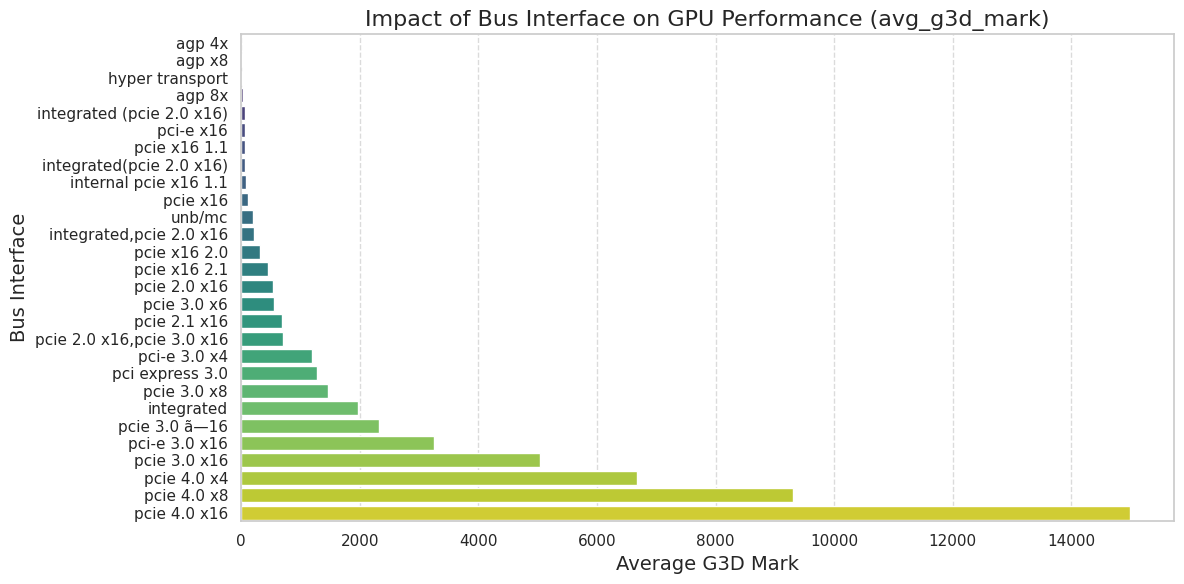

In [32]:
# Clone the gpu_data DataFrame
gpu_data_clone = gpu_data.copy()

# Filter out rows with missing bus_interface or avg_g3d_mark
filtered_gpu_data_clone = gpu_data_clone.dropna(subset=['bus_interface', 'avg_g3d_mark'])

# Group by bus_interface and calculate the average avg_g3d_mark
bus_interface_performance = filtered_gpu_data_clone.groupby('bus_interface')['avg_g3d_mark'].mean().sort_values()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(y=bus_interface_performance.index, x=bus_interface_performance.values, palette="viridis", orient='h')
plt.title("Impact of Bus Interface on GPU Performance (avg_g3d_mark)", fontsize=16)
plt.xlabel("Average G3D Mark", fontsize=14)
plt.ylabel("Bus Interface", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#### Power Consumption (TDP)

Features:
- `max_tdp`

##### Performance vs Power

Correlation between max_tdp and avg_g3d_mark: 0.75


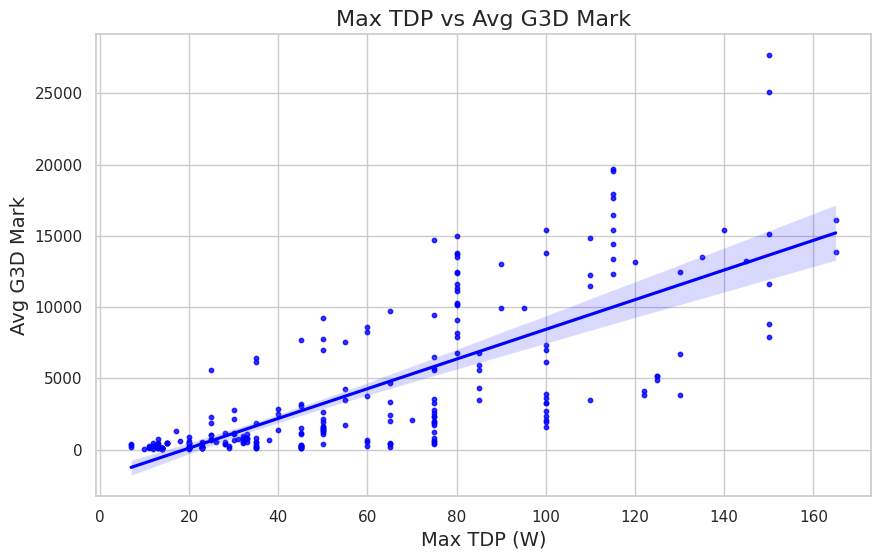

In [33]:
# Clone the gpu_data DataFrame
gpu_data_clone = gpu_data.copy()

# Ensure 'max_tdp' column is numeric
gpu_data_clone['max_tdp'] = pd.to_numeric(gpu_data_clone['max_tdp'], errors='coerce')

# Calculate correlation
correlation_tdp_g3d = gpu_data_clone['max_tdp'].corr(gpu_data_clone['avg_g3d_mark'])

# Print the correlation result
print(f"Correlation between max_tdp and avg_g3d_mark: {correlation_tdp_g3d:.2f}")

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.regplot(data=gpu_data_clone, x='max_tdp', y='avg_g3d_mark', color='blue', scatter_kws={'s': 10})

# Add titles and labels
plt.title("Max TDP vs Avg G3D Mark", fontsize=16)
plt.xlabel("Max TDP (W)", fontsize=14)
plt.ylabel("Avg G3D Mark", fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

##### Efficiency

In [34]:
# Clone the gpu_data DataFrame
gpu_data_clone = gpu_data.copy()

# Ensure 'avg_g3d_mark' and 'max_tdp' columns are numeric
gpu_data_clone['avg_g3d_mark'] = pd.to_numeric(gpu_data_clone['avg_g3d_mark'], errors='coerce')
gpu_data_clone['max_tdp'] = pd.to_numeric(gpu_data_clone['max_tdp'], errors='coerce')

# Exclude rows where 'max_tdp' is NaN
gpu_data_clone = gpu_data_clone.dropna(subset=['max_tdp'])

# Compute performance efficiency
gpu_data_clone['efficiency'] = gpu_data_clone['avg_g3d_mark'] / gpu_data_clone['max_tdp']

# Sort the DataFrame by 'efficiency'
gpu_data_sorted = gpu_data_clone.sort_values(by='efficiency', ascending=False)

# Display the top 5 rows of the sorted DataFrame
print("Top 5 GPUs by Efficiency:")
print(gpu_data_sorted[['name', 'avg_g3d_mark', 'max_tdp', 'efficiency']].head())

# Display the bottom 5 rows of the sorted DataFrame
print("\nBottom 5 GPUs by Efficiency:")
print(gpu_data_sorted[['name', 'avg_g3d_mark', 'max_tdp', 'efficiency']].tail())

Top 5 GPUs by Efficiency:
                 name  avg_g3d_mark  max_tdp  efficiency
509  radeon pro w6300          5560     25.0  222.400000
595   radeon rx 7600s         14679     75.0  195.720000
597   radeon rx 6700s         14969     80.0  187.112500
555  radeon pro 5600m          9233     50.0  184.660000
617  geforce rtx 4090         27668    150.0  184.453333

Bottom 5 GPUs by Efficiency:
                    name  avg_g3d_mark  max_tdp  efficiency
103       radeon hd 6320           147     45.0    3.266667
167  geforce go 7800 gtx           210     65.0    3.230769
84        radeon hd 6310           122     45.0    2.711111
63        radeon hd 6250            94     35.0    2.685714
70        radeon hd 6290           105     45.0    2.333333


#### Overall Performance Ratings

Features:
- `avg_g3d_mark` (3DMark score)
- `test_gpu_compute` (compute performance)

##### Distribution of ratings

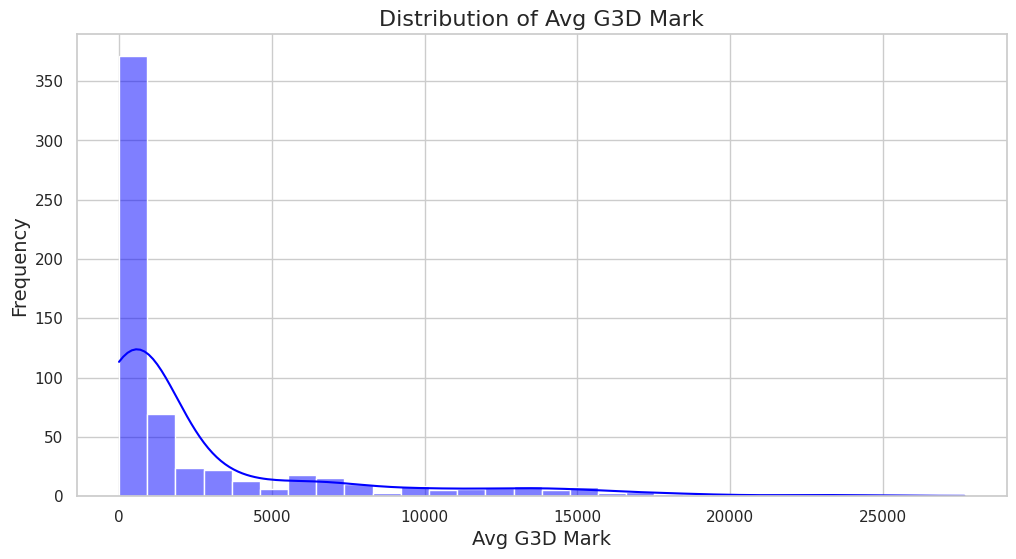

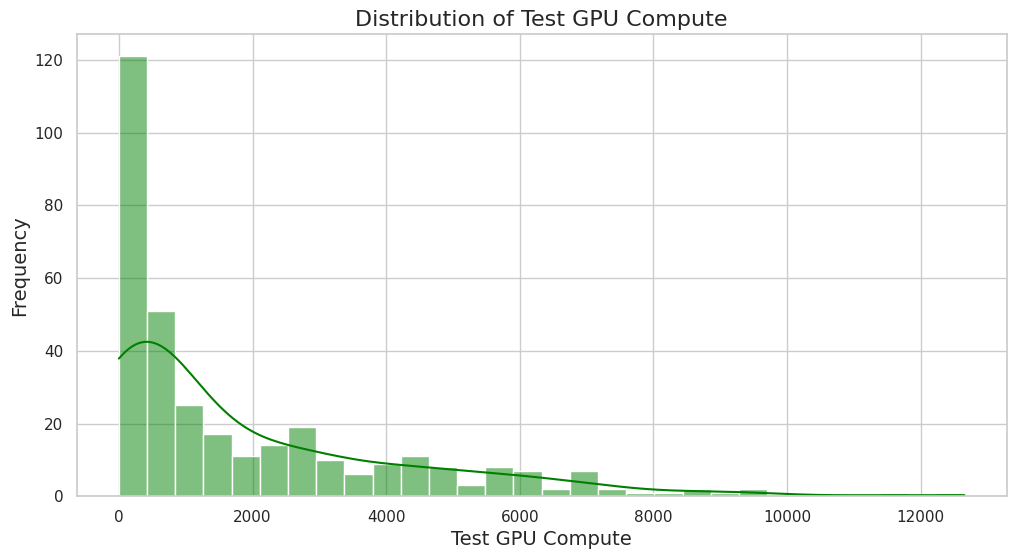

In [35]:
# Plot the distribution of avg_g3d_mark
plt.figure(figsize=(12, 6))
sns.histplot(gpu_data['avg_g3d_mark'].dropna(), kde=True, color='blue', bins=30)
plt.title("Distribution of Avg G3D Mark", fontsize=16)
plt.xlabel("Avg G3D Mark", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# Plot the distribution of test_gpu_compute
plt.figure(figsize=(12, 6))
sns.histplot(gpu_data['test_gpu_compute'].dropna(), kde=True, color='green', bins=30)
plt.title("Distribution of Test GPU Compute", fontsize=16)
plt.xlabel("Test GPU Compute", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

##### Compute vs Gaming

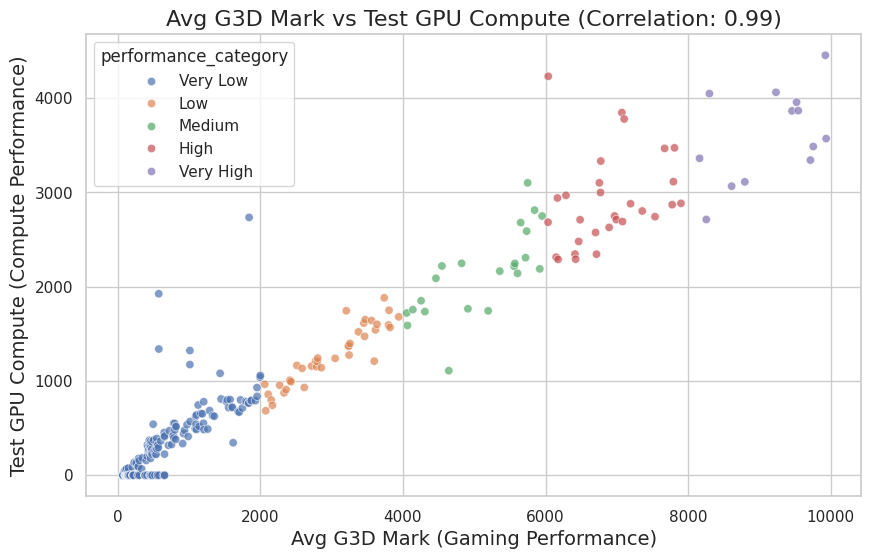

The correlation between avg_g3d_mark and test_gpu_compute is: 0.99


In [36]:
# Clone the gpu_data DataFrame
gpu_data_clone = gpu_data.copy()

# Create performance categories based on avg_g3d_mark
bins = [0, 2000, 4000, 6000, 8000, 10000]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
gpu_data_clone['performance_category'] = pd.cut(gpu_data_clone['avg_g3d_mark'], bins=bins, labels=labels)

# Calculate correlation
correlation_gaming_compute = gpu_data_clone['avg_g3d_mark'].corr(gpu_data_clone['test_gpu_compute'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gpu_data_clone, x='avg_g3d_mark', y='test_gpu_compute', hue='performance_category', alpha=0.7)

# Add titles and labels
plt.title(f"Avg G3D Mark vs Test GPU Compute (Correlation: {correlation_gaming_compute:.2f})", fontsize=16)
plt.xlabel("Avg G3D Mark (Gaming Performance)", fontsize=14)
plt.ylabel("Test GPU Compute (Compute Performance)", fontsize=14)
plt.grid(True)

# Show plot
plt.show()

# Print correlation
print(f"The correlation between avg_g3d_mark and test_gpu_compute is: {correlation_gaming_compute:.2f}")


## Full Laptop Dataframe

### Source (Laptop Shop)

#### Analyzing number of laptops from each source

/tmp/ipykernel_538/3058434414.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=source_counts.index, x=source_counts.values, palette="viridis")


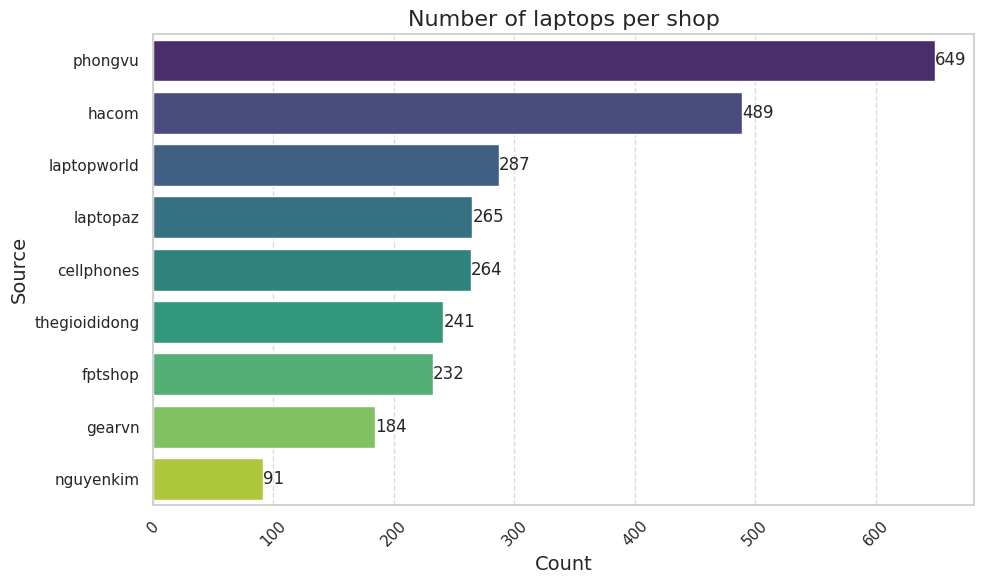

In [37]:
# Get the unique values and their counts
source_counts = full_relation['laptop_specs_source'].value_counts()

# Plot the unique values and their counts
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=source_counts.index, x=source_counts.values, palette="viridis")
plt.title("Number of laptops per shop", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Source", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Show the plot
plt.show()

#### Analysising price grouped by source

/tmp/ipykernel_538/3580318046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_relation, y='laptop_specs_source', x='laptop_specs_price', palette="viridis")


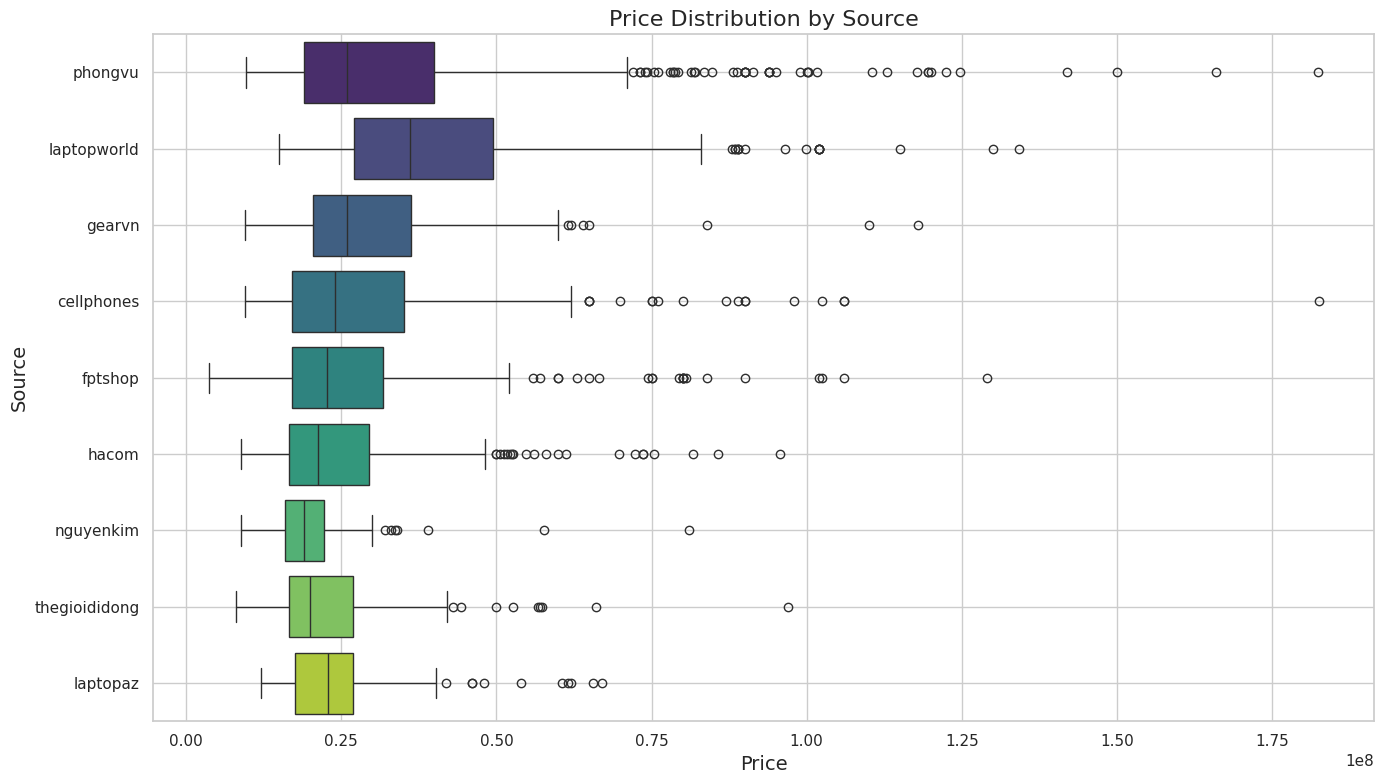

In [38]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create a boxplot for price distribution by brand/source
plt.figure(figsize=(14, 8))
sns.boxplot(data=full_relation, y='laptop_specs_source', x='laptop_specs_price', palette="viridis")

# Add titles and labels
plt.title("Price Distribution by Source", fontsize=16)
plt.ylabel("Source", fontsize=14)
plt.xlabel("Price", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
# Group by 'laptop_specs_source' and calculate descriptive statistics for 'laptop_specs_price'
price_stats_by_source = full_relation.groupby('laptop_specs_source')['laptop_specs_price'].describe()

# Print the statistics
print(price_stats_by_source)

                     count          mean           std         min  \
laptop_specs_source                                                  
cellphones           264.0  2.994519e+07  2.073170e+07   9490000.0   
fptshop              232.0  2.868957e+07  1.949101e+07   3590000.0   
gearvn               184.0  3.044543e+07  1.562514e+07   9490000.0   
hacom                489.0  2.441693e+07  1.206659e+07   8799000.0   
laptopaz             265.0  2.375830e+07  9.536130e+06  11990000.0   
laptopworld          287.0  4.186979e+07  2.161909e+07  14990000.0   
nguyenkim             91.0  2.023209e+07  9.465540e+06   8900000.0   
phongvu              649.0  3.362795e+07  2.288596e+07   9690000.0   
thegioididong        241.0  2.250369e+07  1.038162e+07   7990000.0   

                            25%         50%         75%          max  
laptop_specs_source                                                   
cellphones           16990000.0  23990000.0  35115000.0  182490000.0  
fptshop         

### Brand

#### Analysing number of laptops from each brand

/tmp/ipykernel_538/2418909123.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=brand_counts.index, x=brand_counts.values, palette="viridis")


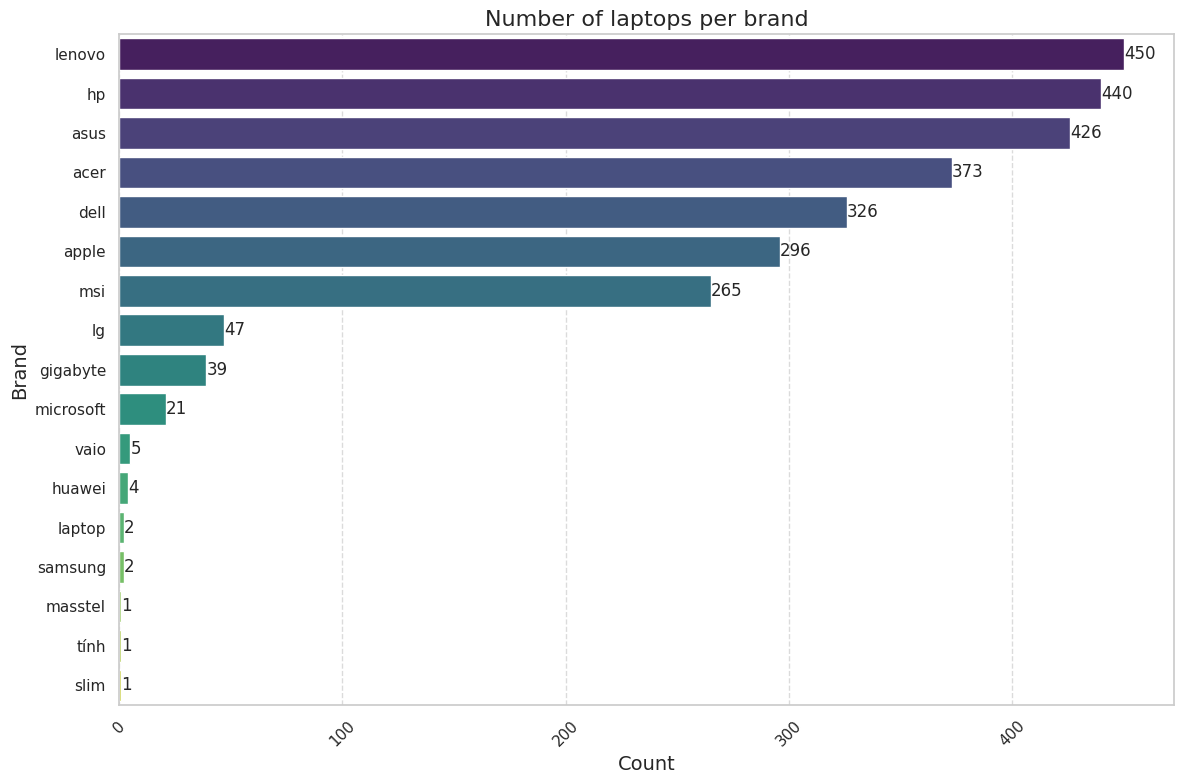

In [40]:
# Get the unique values and their counts
brand_counts = full_relation['laptop_specs_brand'].value_counts()

# Plot the unique values and their counts
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=brand_counts.index, x=brand_counts.values, palette="viridis")
plt.title("Number of laptops per brand", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Brand", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Show the plot
plt.show()

#### Analysising price grouped by brand

/tmp/ipykernel_538/2449895171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_relation, y='laptop_specs_brand', x='laptop_specs_price', palette="viridis")


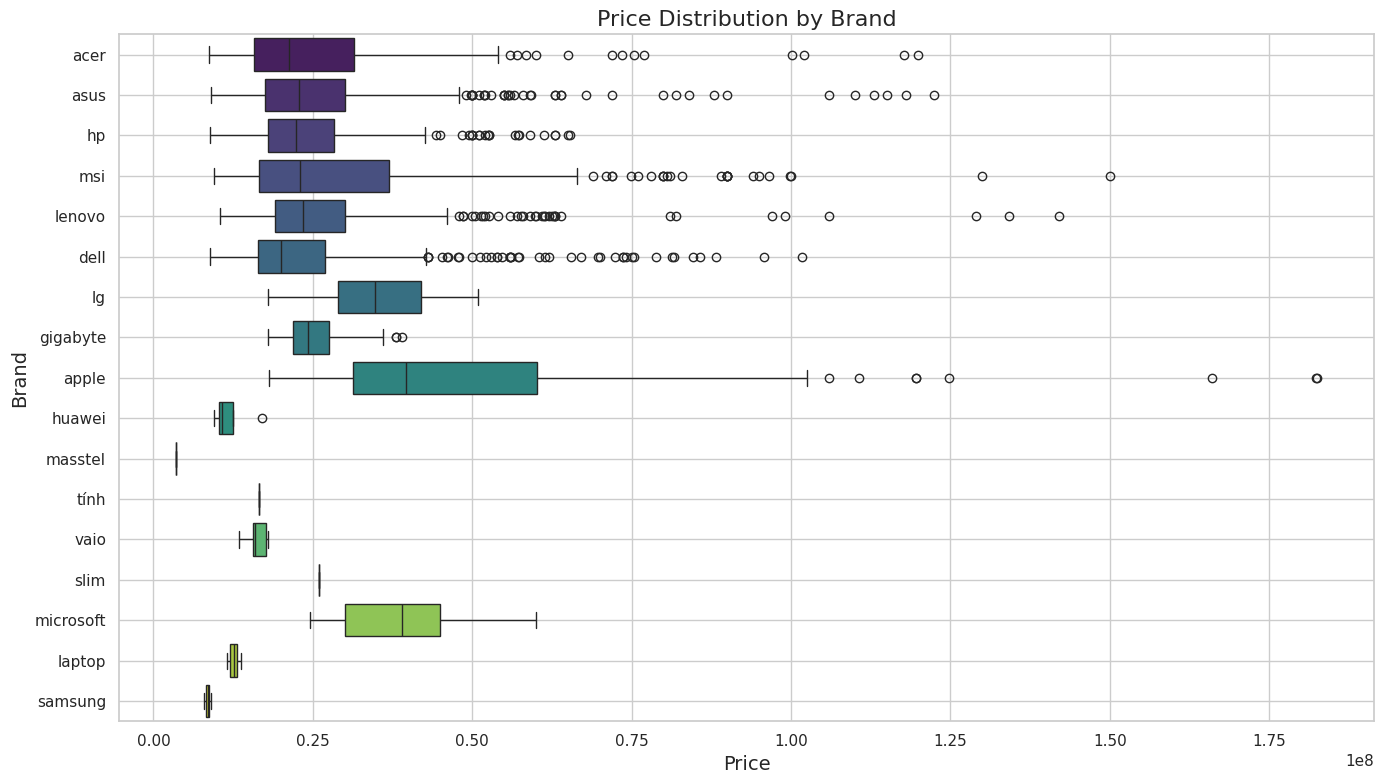

In [41]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create a boxplot for price distribution by brand
plt.figure(figsize=(14, 8))
sns.boxplot(data=full_relation, y='laptop_specs_brand', x='laptop_specs_price', palette="viridis")

# Add titles and labels
plt.title("Price Distribution by Brand", fontsize=16)
plt.ylabel("Brand", fontsize=14)
plt.xlabel("Price", fontsize=14)

plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Central Processing Unit (CPU)

#### Basic analysis

In [42]:
# Group by 'laptop_specs_cpu' and calculate the mean price and count
mean_price_by_cpu = full_relation.groupby('laptop_specs_cpu')['laptop_specs_price'].agg(['mean', 'count'])
print("Number of unique CPUs:", mean_price_by_cpu.shape[0], end='\n\n')

# Sort the DataFrame by mean price
mean_price_by_cpu = mean_price_by_cpu.sort_values(by='mean', ascending=False)

# Format the mean price as currency
mean_price_by_cpu['mean'] = mean_price_by_cpu['mean'].apply(lambda x: f"{x:,.2f}đ")

# Display the results
print("Top 10 CPUs by Mean Price:")
print(mean_price_by_cpu.head(10), '\n\n')

print("Bottom 10 CPUs by Mean Price:")
print(mean_price_by_cpu.tail(10), '\n\n')


# Sort the DataFrame by count
mean_price_by_cpu = mean_price_by_cpu.sort_values(by='count', ascending=False)

# Display the results
print("Top 10 CPUs by Count:")
print(mean_price_by_cpu.head(10), '\n\n')

print("Bottom 10 CPUs by Count:")
print(mean_price_by_cpu.tail(10), '\n\n')


Number of unique CPUs: 129

Top 10 CPUs by Mean Price:
                                  mean  count
laptop_specs_cpu                             
apple m3 max 16 core   128,140,000.00đ      6
apple m4 max 16 core   102,240,000.00đ      4
apple m2 max 12 core   101,756,666.67đ     15
apple m4 max 14 core    84,590,000.00đ      8
apple m3 max 14 core    84,440,000.00đ     10
intel core i9 13980hx   81,961,428.57đ      7
intel core i7 13850hx   75,399,500.00đ      4
intel core i9 13950hx   73,969,750.00đ      4
intel core i7 1365u     69,699,000.00đ      1
intel core i9 14900hx   69,551,428.57đ     70 


Bottom 10 CPUs by Mean Price:
                               mean  count
laptop_specs_cpu                          
amd ryzen 7 5825u    12,990,000.00đ      1
intel core i3 1305u  12,586,714.29đ     14
intel core i3 1315u  12,453,285.71đ     28
amd ryzen 7 5700u    12,230,538.46đ     13
amd ryzen 5 7520u    11,985,444.44đ     18
intel core i3 8145u  11,640,000.00đ      2
intel core i3 12

#### Analyzing CPU performance relation with price

In [43]:
# Calculate correlations
correlation_multithread_price = full_relation['cpu_specs_multithread_rating'].corr(full_relation['laptop_specs_price'])
correlation_single_thread_price = full_relation['cpu_specs_single_thread_rating'].corr(full_relation['laptop_specs_price'])

# Print the results
print(f"Correlation between multithread_rating and price: {correlation_multithread_price:.2f}")
print(f"Correlation between single_thread_rating and price: {correlation_single_thread_price:.2f}")

Correlation between multithread_rating and price: 0.64
Correlation between single_thread_rating and price: 0.59


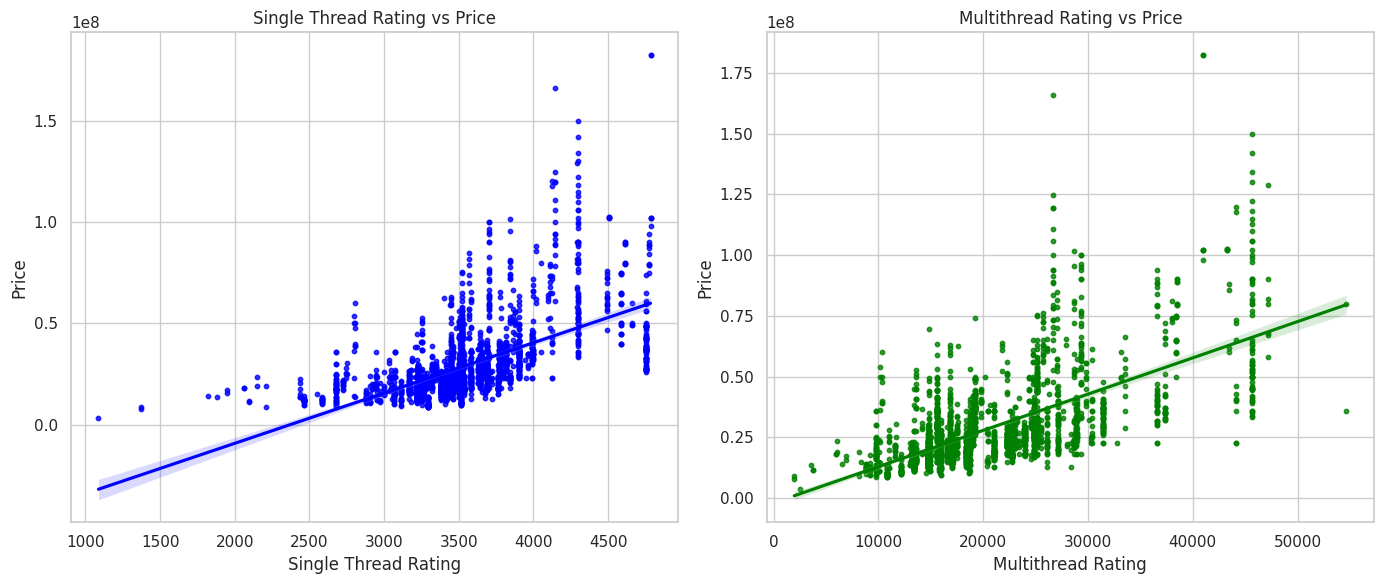

In [44]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot single_thread_rating vs price with regression line
sns.regplot(data=full_relation, x='cpu_specs_single_thread_rating', y='laptop_specs_price', ax=axes[0], color='blue', scatter_kws={'s': 10})
axes[0].set_title('Single Thread Rating vs Price')
axes[0].set_xlabel('Single Thread Rating')
axes[0].set_ylabel('Price')

# Plot multithread_rating vs price with regression line
sns.regplot(data=full_relation, x='cpu_specs_multithread_rating', y='laptop_specs_price', ax=axes[1], color='green', scatter_kws={'s': 10})
axes[1].set_title('Multithread Rating vs Price')
axes[1].set_xlabel('Multithread Rating')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

### Graphics Processing Unit (GPU)

#### Basic analysis

In [45]:
# Group by 'laptop_specs_gpu' and calculate the mean price and count
mean_price_by_gpu = full_relation.groupby('laptop_specs_vga')['laptop_specs_price'].agg(['mean', 'count'])
print("Number of unique GPUs:", mean_price_by_gpu.shape[0], end='\n\n')

# Sort the DataFrame by mean price
mean_price_by_gpu = mean_price_by_gpu.sort_values(by='mean', ascending=False)

# Format the mean price as currency
mean_price_by_gpu['mean'] = mean_price_by_gpu['mean'].apply(lambda x: f"{x:,.2f}đ")

# Display the results
print("Top 10 GPUs by Mean Price:")
print(mean_price_by_gpu.head(10), '\n\n')

print("Bottom 10 GPUs by Mean Price:")
print(mean_price_by_gpu.tail(10), '\n\n')


# Sort the DataFrame by count
mean_price_by_gpu = mean_price_by_gpu.sort_values(by='count', ascending=False)

# Display the results
print("Top 10 GPUs by Count:")
print(mean_price_by_gpu.head(10), '\n\n')

print("Bottom 10 GPUs by Count:")
print(mean_price_by_gpu.tail(10), '\n\n')

Number of unique GPUs: 21

Top 10 GPUs by Mean Price:
                                    mean  count
laptop_specs_vga                               
geforce rtx 4090         105,975,714.29đ     21
geforce rtx 4080          84,420,000.00đ     30
rtx 2000 ada generation   81,022,916.67đ     12
rtx a1000                 66,099,500.00đ      4
geforce rtx 4070          52,101,764.71đ     85
rtx a500                  49,051,888.89đ      9
rtx 500 ada generation    48,240,000.00đ      2
geforce rtx 3070 ti       39,840,000.00đ      4
geforce rtx 4060          35,624,334.62đ    260
geforce rtx 3060          28,675,714.29đ     28 


Bottom 10 GPUs by Mean Price:
                               mean  count
laptop_specs_vga                          
geforce rtx 3070     28,290,000.00đ      6
geforce rtx 3050 ti  27,331,935.48đ     31
geforce mx570        26,062,666.67đ      3
radeon rx 7600s      23,323,333.33đ      3
geforce rtx 3050     22,468,951.61đ    186
geforce mx450        20,942,250.00đ 

#### Analyzing GPU performance relation with price

In [46]:
# Calculate the correlation between avg_g3d_mark and price
correlation_avg_g3d_mark_price = full_relation['gpu_specs_avg_g3d_mark'].corr(full_relation['laptop_specs_price'])

# Print the correlation result
print(f"Correlation between avg_g3d_mark and price: {correlation_avg_g3d_mark_price:.2f}")

Correlation between avg_g3d_mark and price: 0.70


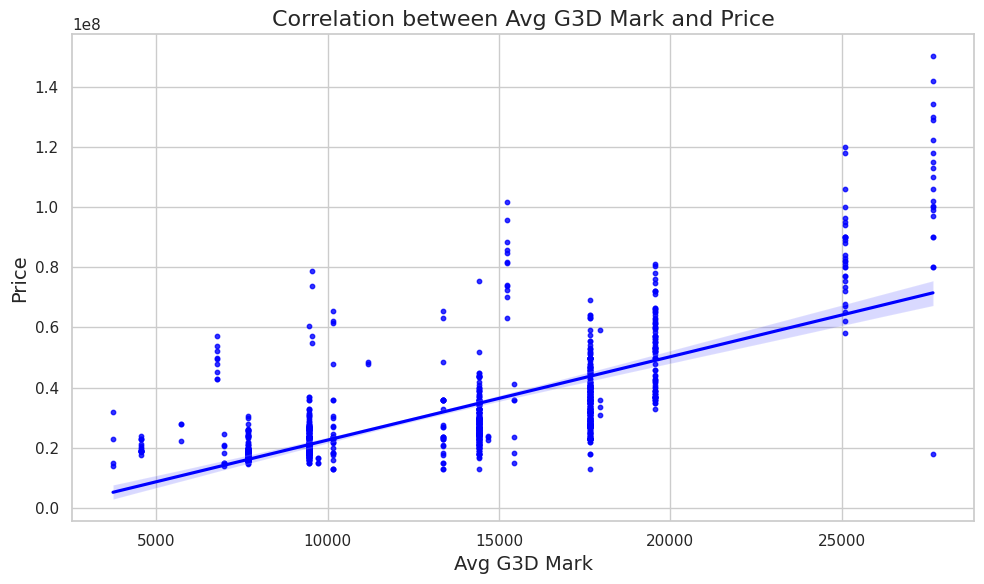

In [47]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=full_relation, x='gpu_specs_avg_g3d_mark', y='laptop_specs_price', color='blue', scatter_kws={'s': 10})

# Add titles and labels
plt.title("Correlation between Avg G3D Mark and Price", fontsize=16)
plt.xlabel("Avg G3D Mark", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Random Access Memory (RAM)

#### Basic analysis

In [48]:
# Print unique values and their counts for RAM amount
ram_amount_counts = full_relation['laptop_specs_ram_amount'].value_counts()
print("Unique RAM amounts and their counts:")
print(ram_amount_counts)

# Print unique values and their counts for RAM type
ram_type_counts = full_relation['laptop_specs_ram_type'].value_counts()
print("\nUnique RAM types and their counts:")
print(ram_type_counts)

Unique RAM amounts and their counts:
laptop_specs_ram_amount
16.0     1458
8.0       751
32.0      269
24.0       53
12.0       43
4.0        34
64.0       22
36.0       22
512.0      15
48.0       10
18.0        8
96.0        4
128.0       3
40.0        1
Name: count, dtype: int64

Unique RAM types and their counts:
laptop_specs_ram_type
ddr5    1374
ddr4    1007
Name: count, dtype: int64


/tmp/ipykernel_538/3967087379.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ram_amount_counts.index.astype(int).astype(str), y=ram_amount_counts.values, palette="viridis")


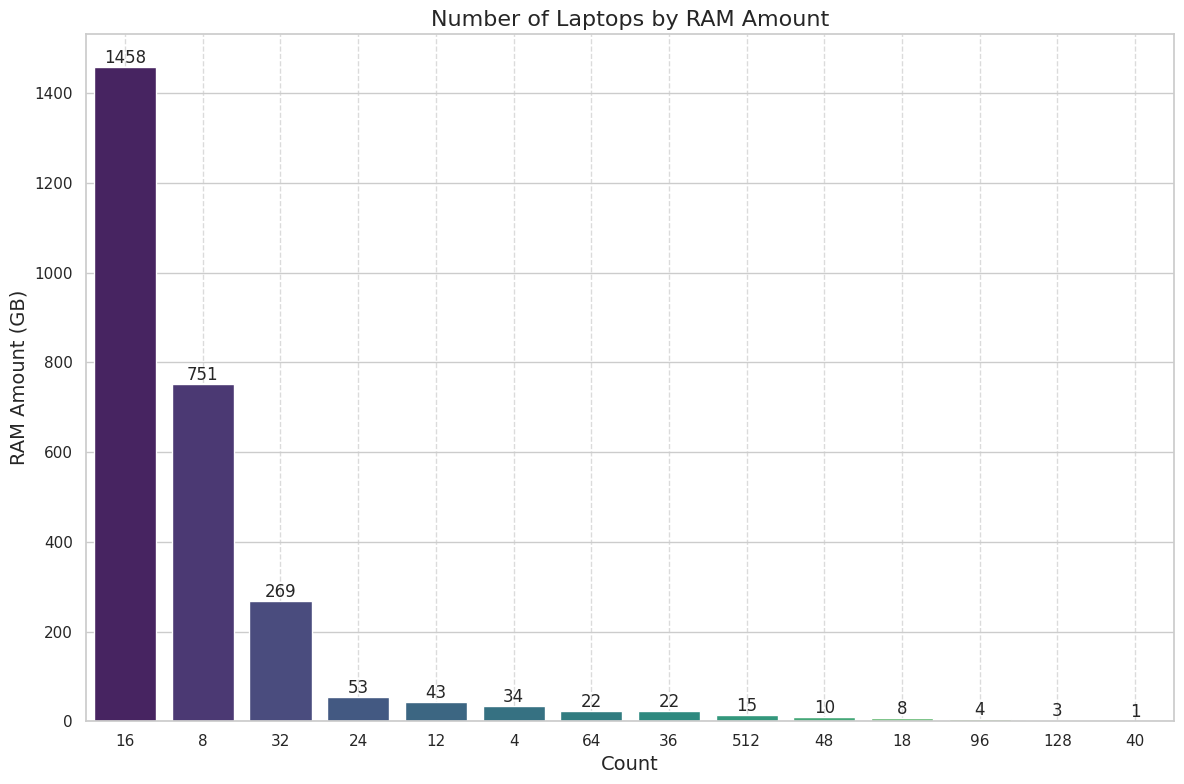

In [49]:
# Convert RAM amount to categorical type
full_relation['laptop_specs_ram_amount'] = pd.Categorical(full_relation['laptop_specs_ram_amount'])

# Plot the unique values and their counts horizontally
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=ram_amount_counts.index.astype(int).astype(str), y=ram_amount_counts.values, palette="viridis")
plt.title("Number of Laptops by RAM Amount", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("RAM Amount (GB)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Show the plot
plt.show()

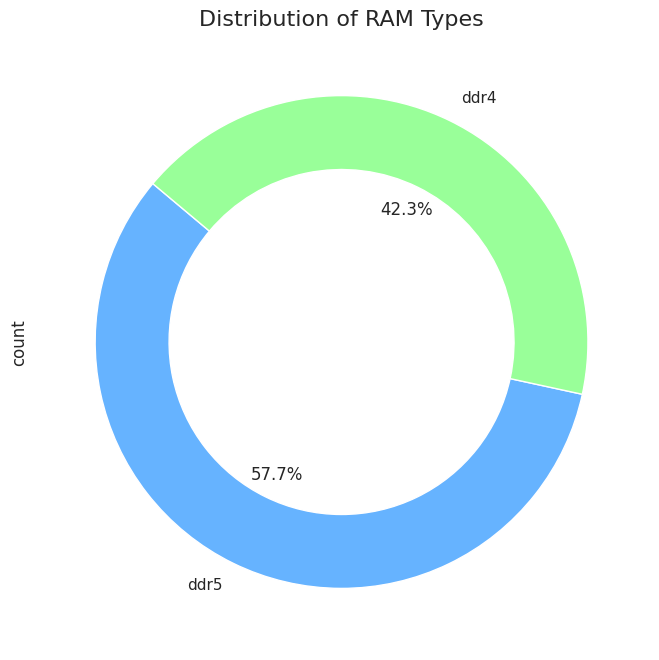

In [50]:
# Plot the pie chart for RAM types
plt.figure(figsize=(8, 8))
ram_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'], labels=ram_type_counts.index, wedgeprops=dict(width=0.3))

# Add title
plt.title("Distribution of RAM Types", fontsize=16)

# Show the plot
plt.show()

#### Analyzing RAM performance relation with price

In [51]:
# Calculate the correlation between RAM amount and price
correlation_ram_price = full_relation['laptop_specs_ram_amount'].astype(float).corr(full_relation['laptop_specs_price'])

# Print the correlation result
print(f"Correlation between RAM amount and price: {correlation_ram_price:.2f}")

Correlation between RAM amount and price: 0.26


/tmp/ipykernel_538/1837874617.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_relation, x='laptop_specs_ram_amount', y='laptop_specs_price', palette="viridis")


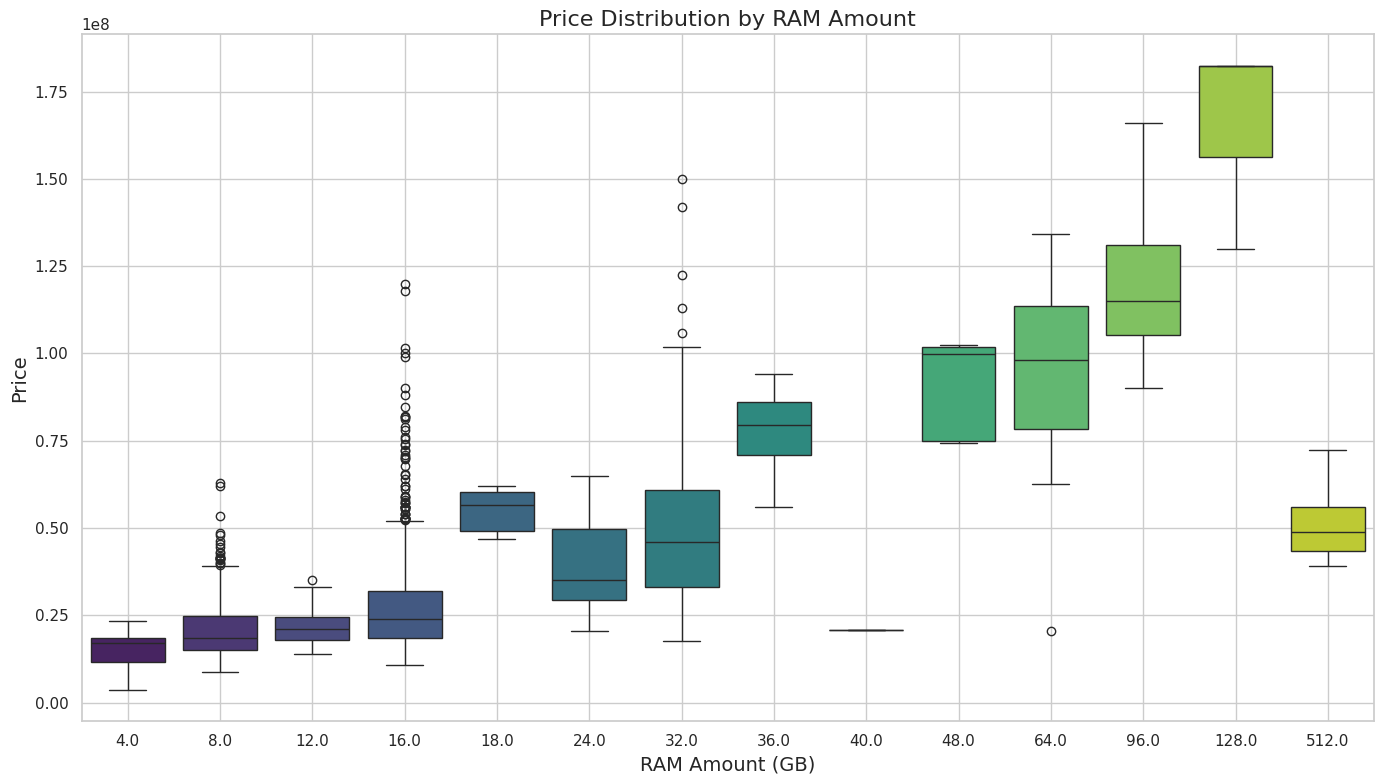

In [52]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create a boxplot for price distribution by RAM amount
plt.figure(figsize=(14, 8))
sns.boxplot(data=full_relation, x='laptop_specs_ram_amount', y='laptop_specs_price', palette="viridis")

# Add titles and labels
plt.title("Price Distribution by RAM Amount", fontsize=16)
plt.xlabel("RAM Amount (GB)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

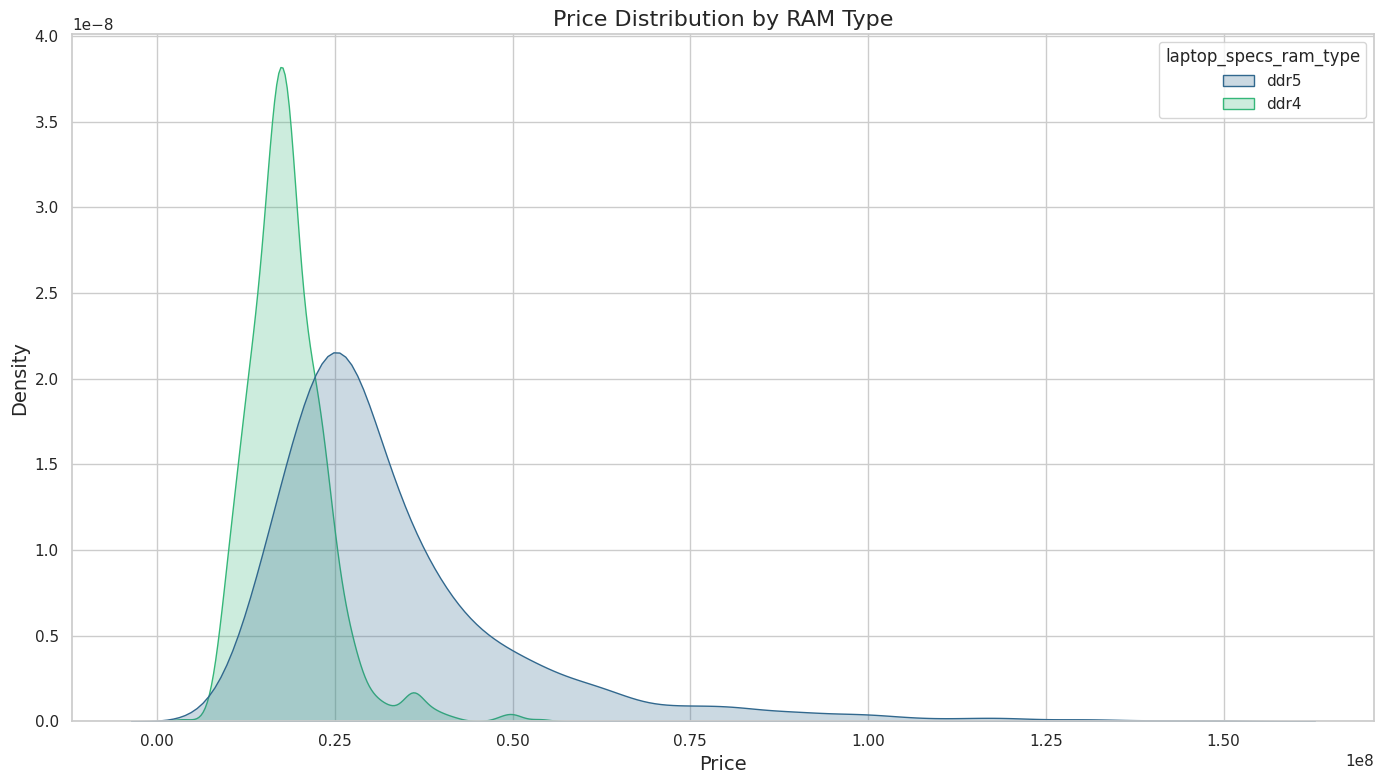

In [53]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create a KDE plot for price distribution by RAM type
plt.figure(figsize=(14, 8))
sns.kdeplot(data=full_relation, x='laptop_specs_price', hue='laptop_specs_ram_type', fill=True, palette="viridis")

# Add titles and labels
plt.title("Price Distribution by RAM Type", fontsize=16)
plt.xlabel("Price", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Storage

#### Basic analysis

In [54]:
# Clone the full_relation DataFrame
full_relation_clone = full_relation.copy()
# Convert 'laptop_specs_storage_amount' to numeric type
full_relation_clone['laptop_specs_storage_amount'] = pd.to_numeric(full_relation_clone['laptop_specs_storage_amount'], errors='coerce')

# Filter the DataFrame
full_relation_clone = full_relation_clone[full_relation_clone['laptop_specs_storage_amount'] >= 128]

# Print unique values and their counts for storage amount
storage_amount_counts = full_relation_clone['laptop_specs_storage_amount'].value_counts()
print("Unique storage amounts and their counts:")
print(storage_amount_counts)

# Print unique values and their counts for storage type
storage_type_counts = full_relation_clone['laptop_specs_storage_type'].value_counts()
print("\nUnique storage types and their counts:")
print(storage_type_counts)

Unique storage amounts and their counts:
laptop_specs_storage_amount
512.0     1653
1024.0     466
256.0      183
2048.0      53
8192.0       3
4096.0       3
Name: count, dtype: int64

Unique storage types and their counts:
laptop_specs_storage_type
ssd    2299
hdd       4
Name: count, dtype: int64


/tmp/ipykernel_538/4095148162.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=storage_amount_counts.index.astype(int).astype(str), y=storage_amount_counts.values, palette="viridis")


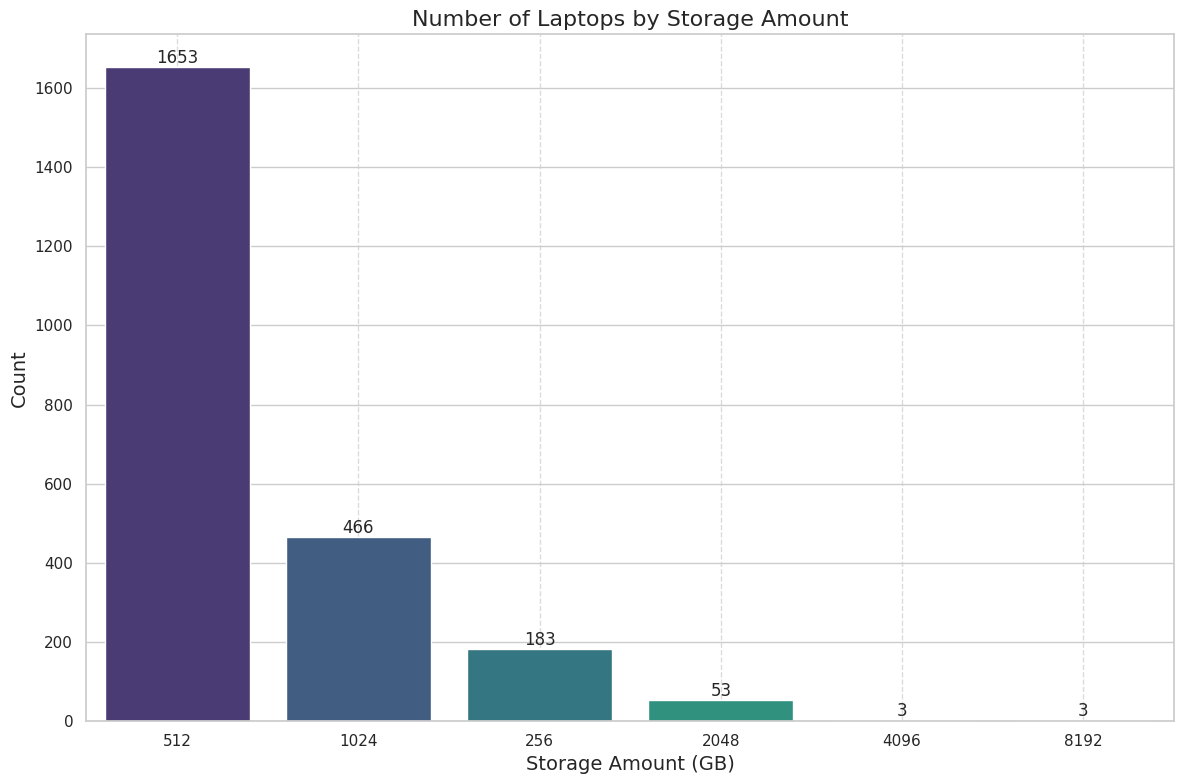

In [55]:
# Convert storage amount to categorical type
full_relation_clone['laptop_specs_storage_amount'] = pd.Categorical(full_relation_clone['laptop_specs_storage_amount'])

# Plot the unique values and their counts horizontally
storage_amount_counts = full_relation_clone['laptop_specs_storage_amount'].value_counts()
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=storage_amount_counts.index.astype(int).astype(str), y=storage_amount_counts.values, palette="viridis")
plt.title("Number of Laptops by Storage Amount", fontsize=16)
plt.xlabel("Storage Amount (GB)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Show the plot
plt.show()

#### Analyzing Storage relation with price

In [56]:
# Calculate the correlation between storage amount and price
correlation_storage_price = full_relation_clone['laptop_specs_storage_amount'].astype(float).corr(full_relation_clone['laptop_specs_price'])

# Print the correlation result
print(f"Correlation between storage amount and price: {correlation_storage_price:.2f}")

Correlation between storage amount and price: 0.66


/tmp/ipykernel_538/4036590408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_relation_clone, x='laptop_specs_storage_amount', y='laptop_specs_price', palette="viridis")


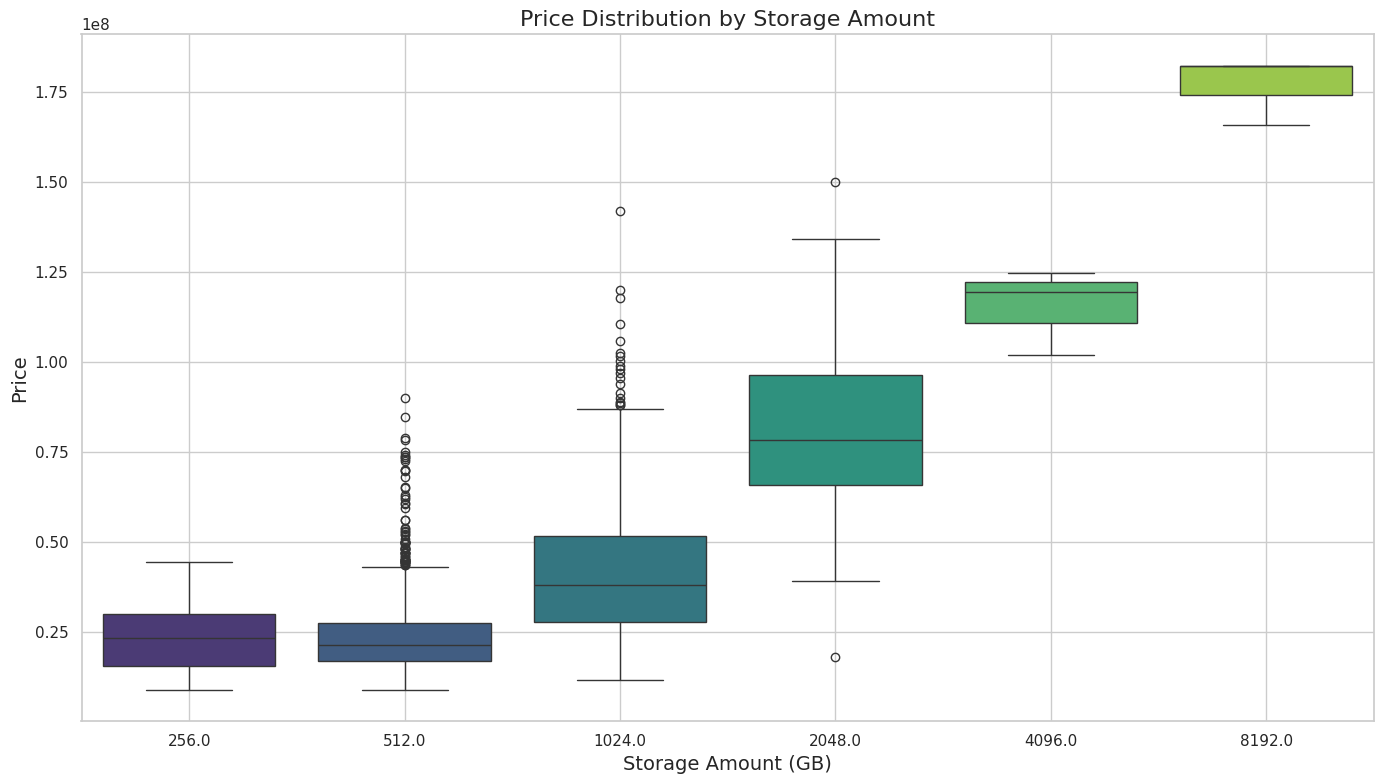

In [57]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create a boxplot for price distribution by storage amount
plt.figure(figsize=(14, 8))
sns.boxplot(data=full_relation_clone, x='laptop_specs_storage_amount', y='laptop_specs_price', palette="viridis")

# Add titles and labels
plt.title("Price Distribution by Storage Amount", fontsize=16)
plt.xlabel("Storage Amount (GB)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Screen Features

#### Basic analysis

In [58]:
# Calculate summary statistics for screen size, refresh rate, and brightness
screen_size_stats = full_relation['laptop_specs_screen_size'].describe()
refresh_rate_stats = full_relation['laptop_specs_screen_refresh_rate'].describe()
brightness_stats = full_relation['laptop_specs_screen_brightness'].describe()

# Print the results
print("Summary Statistics for Screen Size:")
print(screen_size_stats)

print("\nSummary Statistics for Screen Refresh Rate:")
print(refresh_rate_stats)

print("\nSummary Statistics for Screen Brightness:")
print(brightness_stats)

Summary Statistics for Screen Size:
count    2677.000000
mean       15.067762
std         0.990302
min        11.600000
25%        14.000000
50%        15.600000
75%        15.600000
max        18.000000
Name: laptop_specs_screen_size, dtype: float64

Summary Statistics for Screen Refresh Rate:
count    1630.000000
mean      126.676687
std        51.595981
min        60.000000
25%        60.000000
50%       120.000000
75%       144.000000
max       480.000000
Name: laptop_specs_screen_refresh_rate, dtype: float64

Summary Statistics for Screen Brightness:
count    1502.000000
mean      350.348202
std       132.497193
min       220.000000
25%       250.000000
50%       300.000000
75%       400.000000
max      1200.000000
Name: laptop_specs_screen_brightness, dtype: float64


/tmp/ipykernel_538/3570925166.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=screen_resolution_counts.index, x=screen_resolution_counts.values, palette="viridis")


Unique screen resolutions and their counts:
laptop_specs_screen_resolution
1920x1080    1330
1920x1200     395
2560x1600     274
2880x1800     196
3024x1964      86
2560x1664      71
3456x2234      43
2880x1864      31
3840x2400      26
3200x2000      23
2880x1620      20
2560x1440      19
2880x1920      18
3072x1920      13
2560x1644      10
2240x1400      10
2048x1280       9
1366x768        9
3456x2160       4
2800x1800       3
1980x1080       2
3000x2000       2
2800x1620       1
1920x1280       1
2960x1848       1
2160x1440       1
3201x2000       1
2220x1080       1
2256x1504       1
1900x1200       1
Name: count, dtype: int64


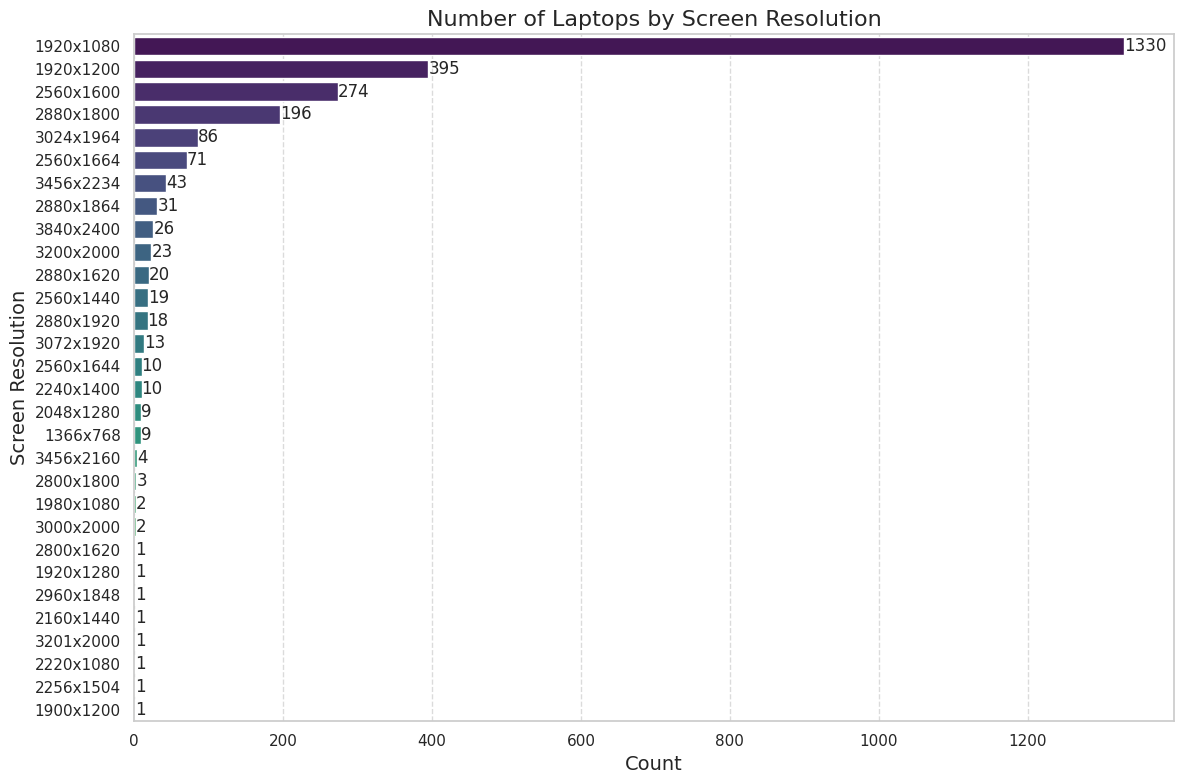

In [59]:
# Print unique values and their counts for screen resolution
screen_resolution_counts = full_relation['laptop_specs_screen_resolution'].value_counts()
print("Unique screen resolutions and their counts:")
print(screen_resolution_counts)

# Plot the unique values and their counts
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=screen_resolution_counts.index, x=screen_resolution_counts.values, palette="viridis")
plt.title("Number of Laptops by Screen Resolution", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Screen Resolution", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Show the plot
plt.show()

#### Analysis of screen features with price

/tmp/ipykernel_538/1749291397.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_relation_clone, y='laptop_specs_screen_resolution', x='laptop_specs_price', palette="viridis")


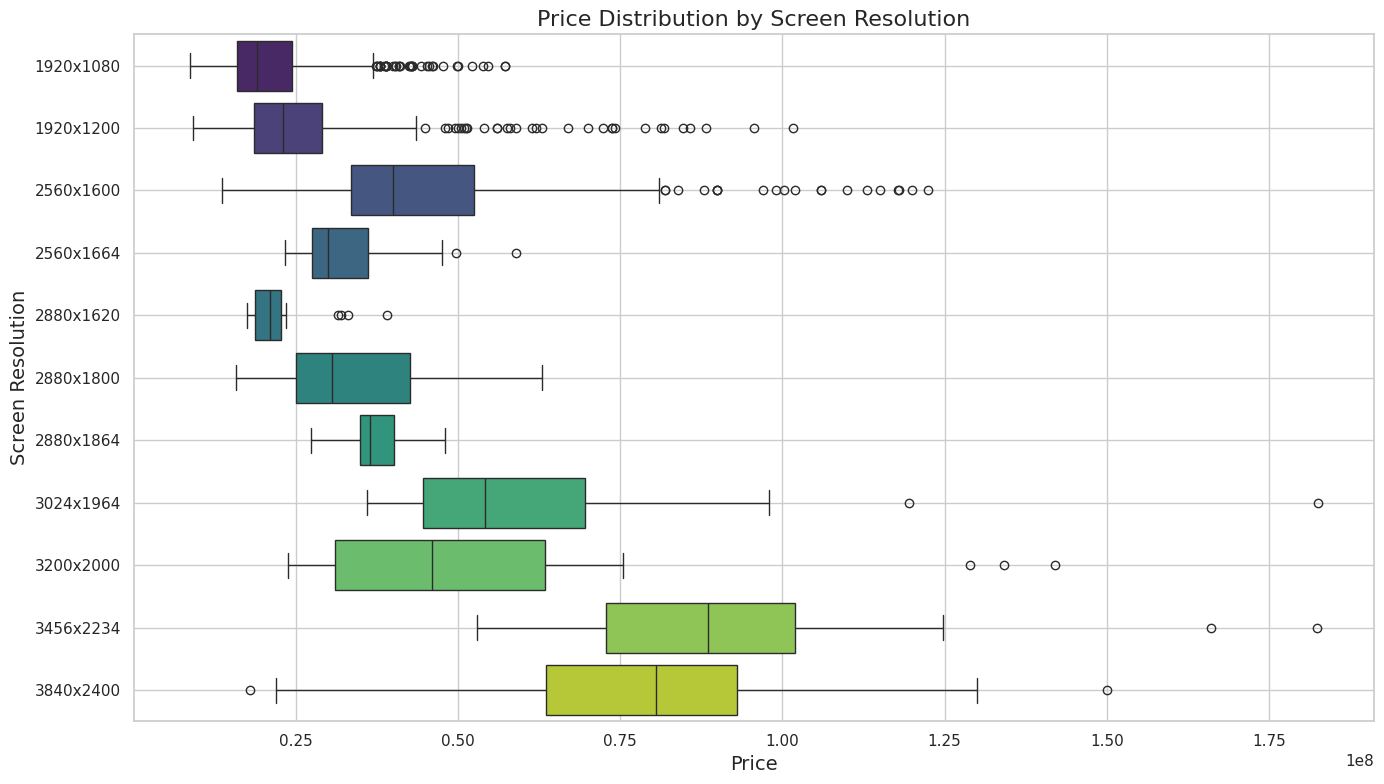

In [60]:
# Clone the full_relation DataFrame
full_relation_clone = full_relation.copy()

# Get the counts of each screen resolution
screen_resolution_counts = full_relation_clone['laptop_specs_screen_resolution'].value_counts()

# Filter out screen resolutions with count < 20
filtered_screen_resolutions = screen_resolution_counts[screen_resolution_counts >= 20].index

# Filter the DataFrame
full_relation_clone = full_relation_clone[full_relation_clone['laptop_specs_screen_resolution'].isin(filtered_screen_resolutions)]

# Set the plot style
sns.set_theme(style="whitegrid")

# Create a boxplot for price distribution by screen resolution
# Sort the DataFrame by screen resolution
full_relation_clone = full_relation_clone.sort_values(by='laptop_specs_screen_resolution')

plt.figure(figsize=(14, 8))
sns.boxplot(data=full_relation_clone, y='laptop_specs_screen_resolution', x='laptop_specs_price', palette="viridis")

# Add titles and labels
plt.title("Price Distribution by Screen Resolution", fontsize=16)
plt.ylabel("Screen Resolution", fontsize=14)
plt.xlabel("Price", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Correlation between screen size and price: 0.19
Correlation between screen refresh rate and price: 0.36
Correlation between screen brightness and price: 0.54


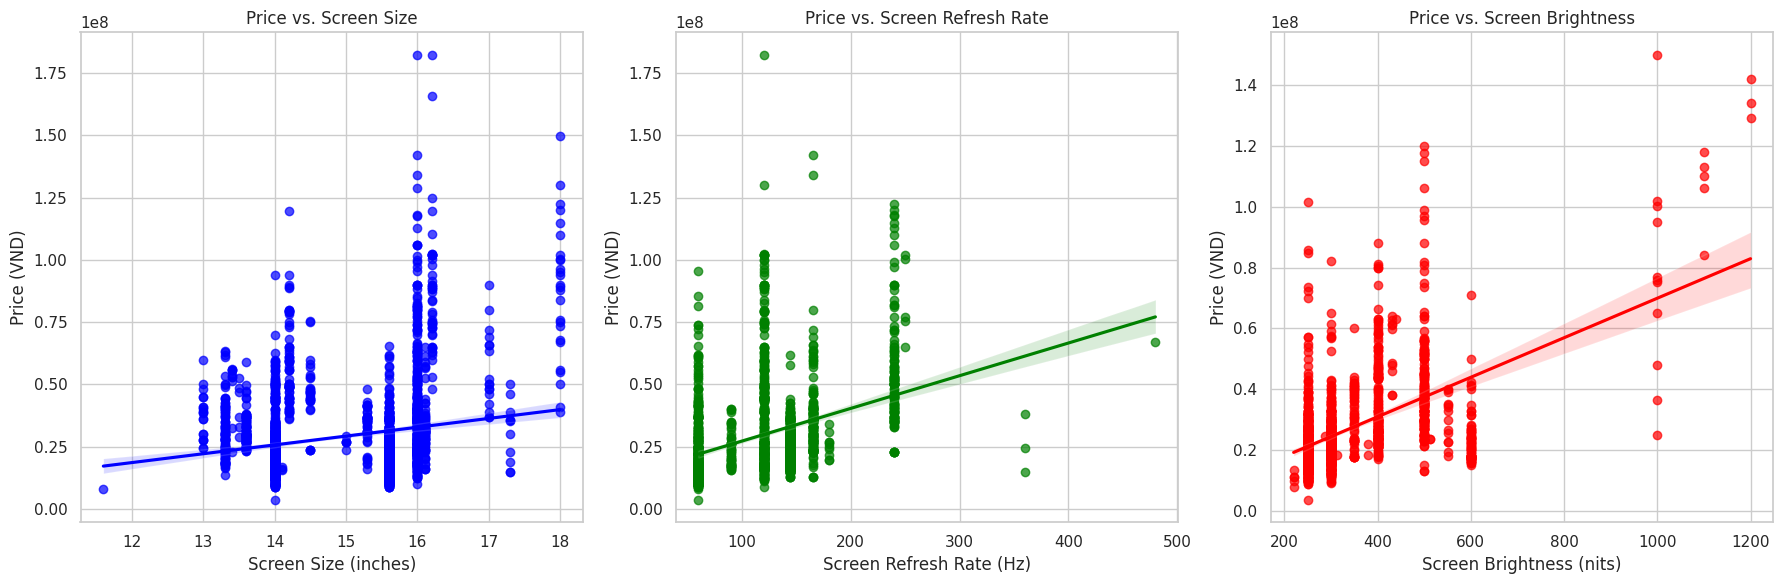

In [61]:
# Print the correlation
correlation_screen_size_price = full_relation['laptop_specs_screen_size'].corr(full_relation['laptop_specs_price'])
correlation_refresh_rate_price = full_relation['laptop_specs_screen_refresh_rate'].corr(full_relation['laptop_specs_price'])
correlation_brightness_price = full_relation['laptop_specs_screen_brightness'].corr(full_relation['laptop_specs_price'])

print(f"Correlation between screen size and price: {correlation_screen_size_price:.2f}")
print(f"Correlation between screen refresh rate and price: {correlation_refresh_rate_price:.2f}")
print(f"Correlation between screen brightness and price: {correlation_brightness_price:.2f}")

# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot price vs. screen size
sns.regplot(data=full_relation, x='laptop_specs_screen_size', y='laptop_specs_price', ax=axes[0], color='blue', scatter_kws={'alpha':0.7})
axes[0].set_title('Price vs. Screen Size')
axes[0].set_xlabel('Screen Size (inches)')
axes[0].set_ylabel('Price (VND)')

# Plot price vs. screen refresh rate
sns.regplot(data=full_relation, x='laptop_specs_screen_refresh_rate', y='laptop_specs_price', ax=axes[1], color='green', scatter_kws={'alpha':0.7})
axes[1].set_title('Price vs. Screen Refresh Rate')
axes[1].set_xlabel('Screen Refresh Rate (Hz)')
axes[1].set_ylabel('Price (VND)')

# Plot price vs. screen brightness
sns.regplot(data=full_relation, x='laptop_specs_screen_brightness', y='laptop_specs_price', ax=axes[2], color='red', scatter_kws={'alpha':0.7})
axes[2].set_title('Price vs. Screen Brightness')
axes[2].set_xlabel('Screen Brightness (nits)')
axes[2].set_ylabel('Price (VND)')

plt.tight_layout()
plt.show()

### Portability Features

#### Weight

Basic analysis

In [62]:
# Print summary statistics for weight
weight_stats = full_relation['laptop_specs_weight'].describe()
print("Summary Statistics for Weight:")
print(weight_stats)

Summary Statistics for Weight:
count    2525.000000
mean        1.825792
std         0.460089
min         0.879000
25%         1.460000
50%         1.700000
75%         2.200000
max         4.000000
Name: laptop_specs_weight, dtype: float64


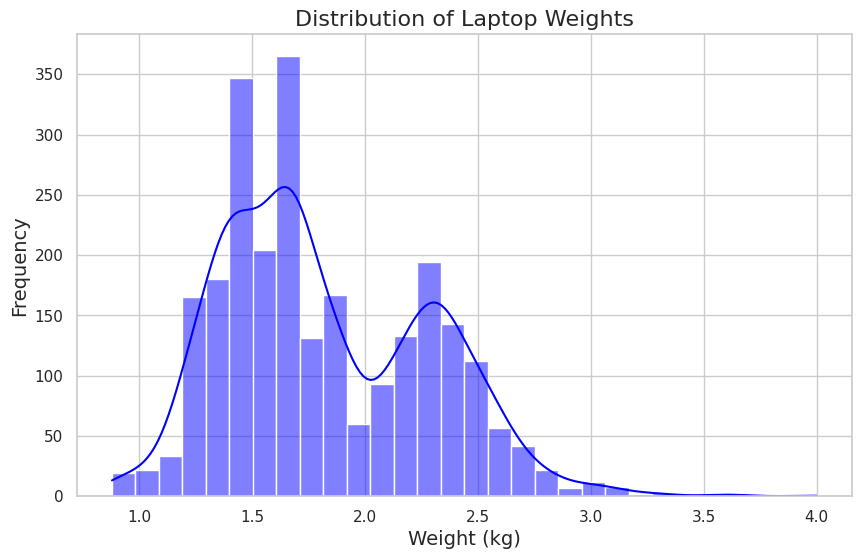

In [63]:
# Plot the distribution of laptop weights
plt.figure(figsize=(10, 6))
sns.histplot(full_relation['laptop_specs_weight'].dropna(), kde=True, color='blue', bins=30)

# Add labels and title
plt.title("Distribution of Laptop Weights", fontsize=16)
plt.xlabel("Weight (kg)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

Analysis of weight with price

In [64]:
# Calculate the correlation between weight and price
correlation_weight_price = full_relation['laptop_specs_weight'].corr(full_relation['laptop_specs_price'])

# Print the correlation result
print(f"Correlation between weight and price: {correlation_weight_price:.2f}")

Correlation between weight and price: 0.28


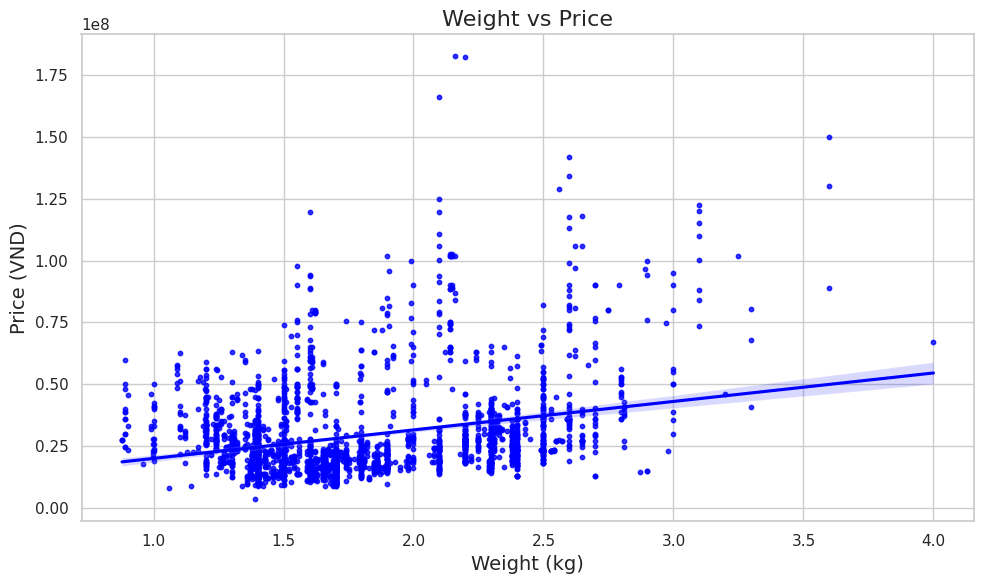

In [65]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=full_relation, x='laptop_specs_weight', y='laptop_specs_price', color='blue', scatter_kws={'s': 10})

# Add titles and labels
plt.title("Weight vs Price", fontsize=16)
plt.xlabel("Weight (kg)", fontsize=14)
plt.ylabel("Price (VND)", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Length, Width, Height

Basic analysis

In [66]:
# Calculate summary statistics for length, width, and height
length_stats = full_relation['laptop_specs_height'].describe()
width_stats = full_relation['laptop_specs_width'].describe()
height_stats = full_relation['laptop_specs_depth'].describe()

# Print the results
print("Summary Statistics for Length:")
print(length_stats)

print("\nSummary Statistics for Width:")
print(width_stats)

print("\nSummary Statistics for Height:")
print(height_stats)

Summary Statistics for Length:
count    1998.000000
mean        2.000681
std         0.925657
min         0.670000
25%         1.690000
50%         1.900000
75%         2.230000
max        22.700000
Name: laptop_specs_height, dtype: float64

Summary Statistics for Width:
count    1998.000000
mean       34.128338
std         2.453755
min        22.810000
25%        31.440000
50%        35.570000
75%        35.940000
max        52.300000
Name: laptop_specs_width, dtype: float64

Summary Statistics for Height:
count    1998.000000
mean       23.661036
std         1.934277
min         3.000000
25%        22.120000
50%        23.560000
75%        25.100000
max        32.000000
Name: laptop_specs_depth, dtype: float64


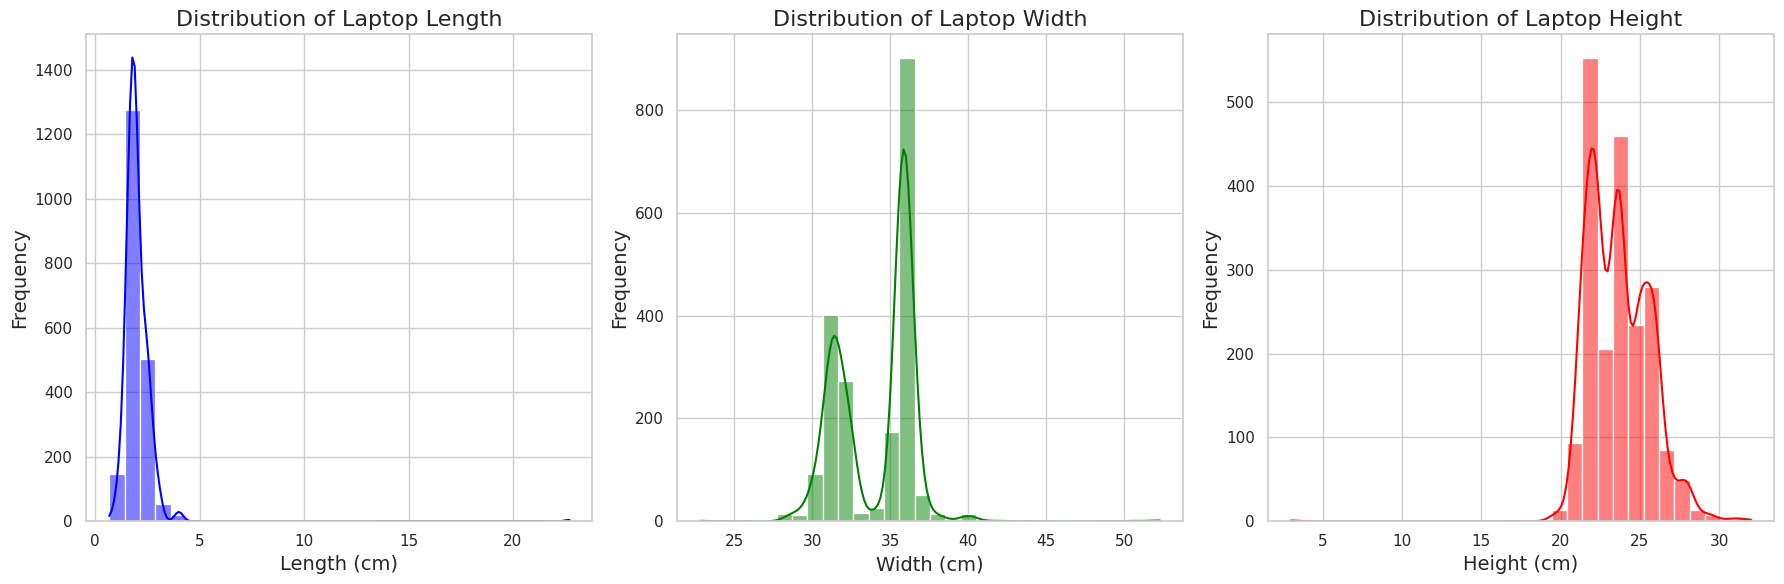

In [67]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the distribution of length
sns.histplot(full_relation['laptop_specs_height'].dropna(), kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title("Distribution of Laptop Length", fontsize=16)
axes[0].set_xlabel("Length (cm)", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)

# Plot the distribution of width
sns.histplot(full_relation['laptop_specs_width'].dropna(), kde=True, color='green', bins=30, ax=axes[1])
axes[1].set_title("Distribution of Laptop Width", fontsize=16)
axes[1].set_xlabel("Width (cm)", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

# Plot the distribution of height
sns.histplot(full_relation['laptop_specs_depth'].dropna(), kde=True, color='red', bins=30, ax=axes[2])
axes[2].set_title("Distribution of Laptop Height", fontsize=16)
axes[2].set_xlabel("Height (cm)", fontsize=14)
axes[2].set_ylabel("Frequency", fontsize=14)

plt.tight_layout()
plt.show()

Analysis of dimensions with price

In [68]:
# Calculate the correlation between length, width, height, and price
correlation_length_price = full_relation['laptop_specs_height'].corr(full_relation['laptop_specs_price'])
correlation_width_price = full_relation['laptop_specs_width'].corr(full_relation['laptop_specs_price'])
correlation_height_price = full_relation['laptop_specs_depth'].corr(full_relation['laptop_specs_price'])

# Print the correlation results
print(f"Correlation between length and price: {correlation_length_price:.2f}")
print(f"Correlation between width and price: {correlation_width_price:.2f}")
print(f"Correlation between height and price: {correlation_height_price:.2f}")

Correlation between length and price: 0.09
Correlation between width and price: -0.02
Correlation between height and price: 0.21


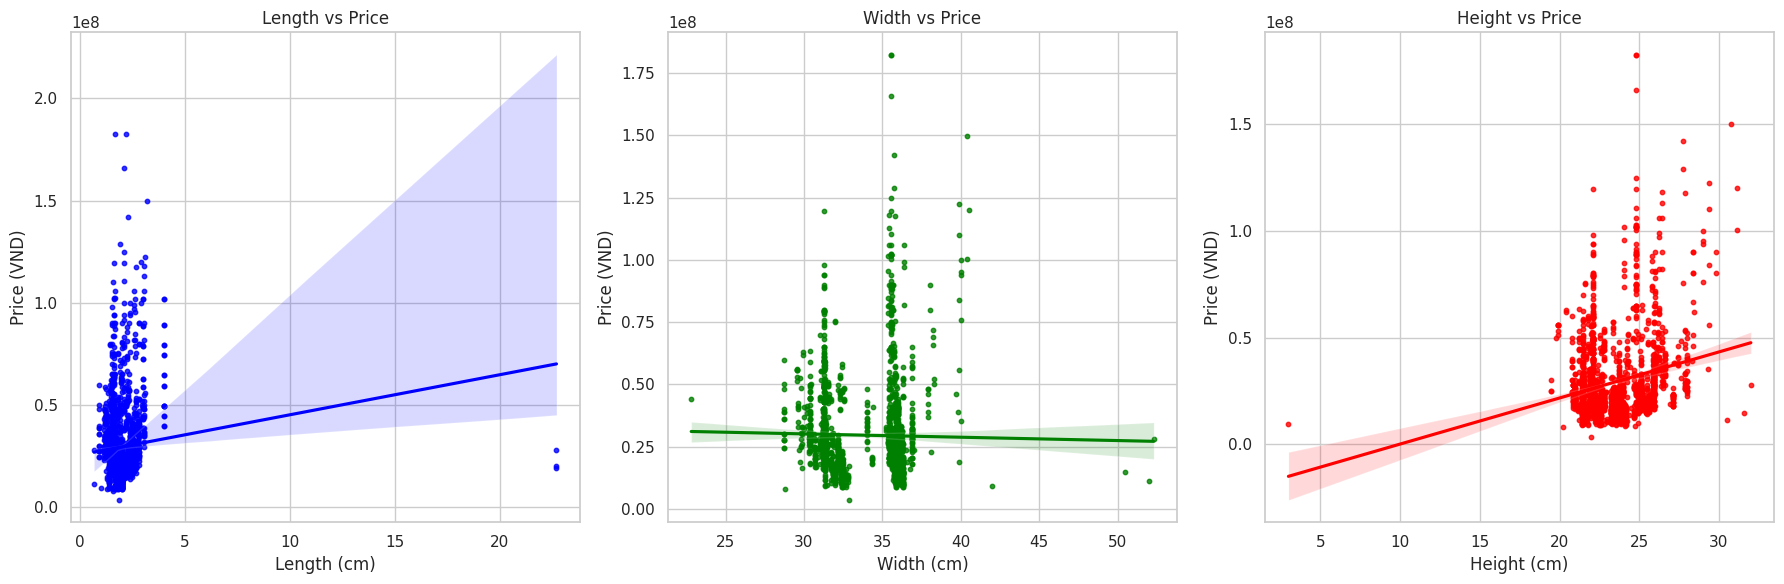

In [69]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot length vs price with regression line
sns.regplot(data=full_relation, x='laptop_specs_height', y='laptop_specs_price', ax=axes[0], color='blue', scatter_kws={'s': 10})
axes[0].set_title('Length vs Price')
axes[0].set_xlabel('Length (cm)')
axes[0].set_ylabel('Price (VND)')

# Plot width vs price with regression line
sns.regplot(data=full_relation, x='laptop_specs_width', y='laptop_specs_price', ax=axes[1], color='green', scatter_kws={'s': 10})
axes[1].set_title('Width vs Price')
axes[1].set_xlabel('Width (cm)')
axes[1].set_ylabel('Price (VND)')

# Plot height vs price with regression line
sns.regplot(data=full_relation, x='laptop_specs_depth', y='laptop_specs_price', ax=axes[2], color='red', scatter_kws={'s': 10})
axes[2].set_title('Height vs Price')
axes[2].set_xlabel('Height (cm)')
axes[2].set_ylabel('Price (VND)')

plt.tight_layout()
plt.show()

Correlation between volume and price: 0.13


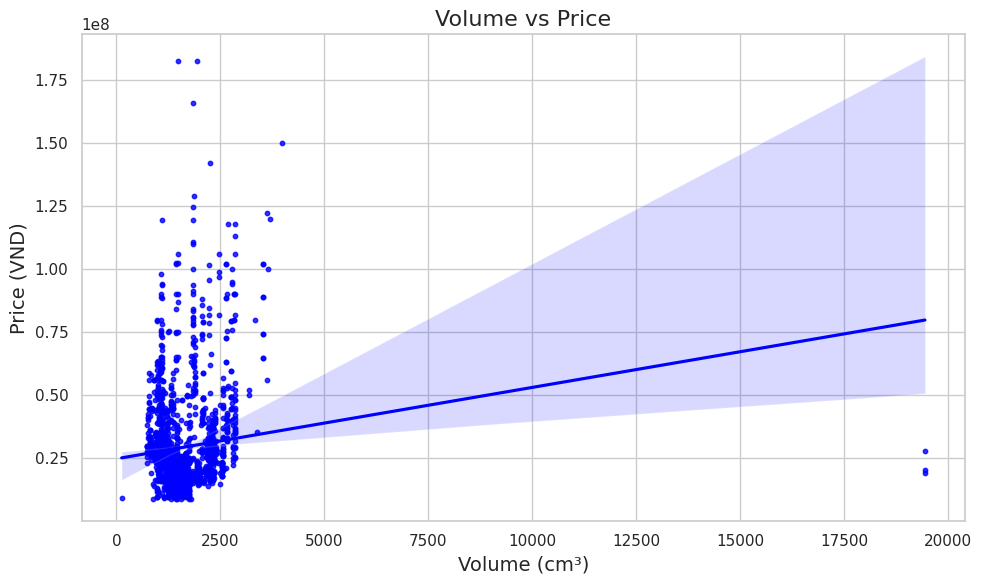

In [70]:
# Calculate the product of length, width, and height
full_relation_clone['volume'] = full_relation_clone['laptop_specs_height'] * full_relation_clone['laptop_specs_width'] * full_relation_clone['laptop_specs_depth']

# Calculate the correlation between volume and price
correlation_volume_price = full_relation_clone['volume'].corr(full_relation_clone['laptop_specs_price'])

# Print the correlation result
print(f"Correlation between volume and price: {correlation_volume_price:.2f}")

# Plot the correlation between volume and price
plt.figure(figsize=(10, 6))
sns.regplot(data=full_relation_clone, x='volume', y='laptop_specs_price', color='blue', scatter_kws={'s': 10})

# Add titles and labels
plt.title("Volume vs Price", fontsize=16)
plt.xlabel("Volume (cm³)", fontsize=14)
plt.ylabel("Price (VND)", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Battery and Power

#### Basic Analysis

In [71]:
# Calculate summary statistics for battery amount and battery cells
battery_amount_stats = full_relation['laptop_specs_battery_capacity'].describe()
battery_cells_stats = full_relation['laptop_specs_battery_cells'].describe()

# Print the results
print("Summary Statistics for Battery Capacity:")
print(battery_amount_stats)

print("\nSummary Statistics for Battery Cells:")
print(battery_cells_stats)

Summary Statistics for Battery Capacity:
count    2372.000000
mean       60.717487
std        16.856594
min        30.000000
25%        50.000000
50%        57.000000
75%        71.000000
max       120.000000
Name: laptop_specs_battery_capacity, dtype: float64

Summary Statistics for Battery Cells:
count    1747.000000
mean        3.514596
std         0.653819
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: laptop_specs_battery_cells, dtype: float64


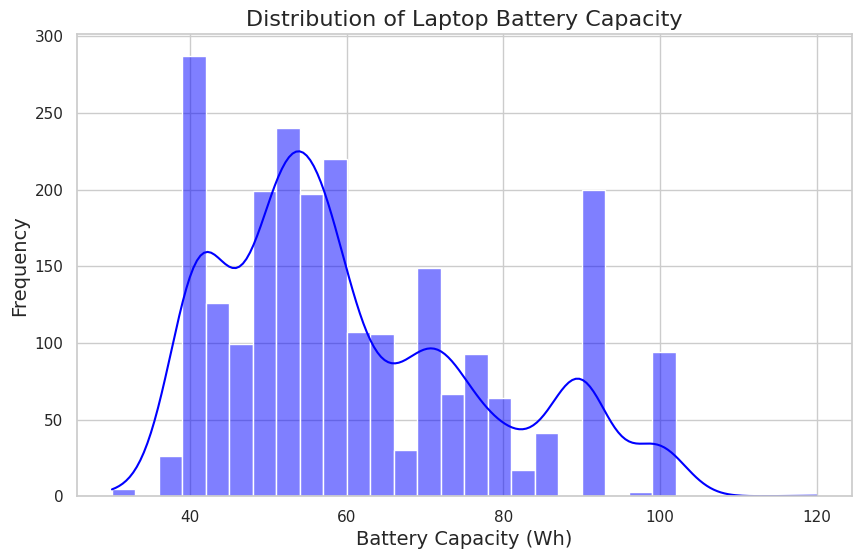

In [72]:
# Plot the distribution of battery capacity
plt.figure(figsize=(10, 6))
sns.histplot(full_relation['laptop_specs_battery_capacity'].dropna(), kde=True, color='blue', bins=30)

# Add labels and title
plt.title("Distribution of Laptop Battery Capacity", fontsize=16)
plt.xlabel("Battery Capacity (Wh)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

Analysis of battery and power features with price

In [73]:
# Calculate the correlation between battery capacity and price
correlation_battery_capacity_price = full_relation['laptop_specs_battery_capacity'].corr(full_relation['laptop_specs_price'])

# Calculate the correlation between battery cells and price
correlation_battery_cells_price = full_relation['laptop_specs_battery_cells'].corr(full_relation['laptop_specs_price'])

# Print the correlation results
print(f"Correlation between battery capacity and price: {correlation_battery_capacity_price:.2f}")
print(f"Correlation between battery cells and price: {correlation_battery_cells_price:.2f}")

Correlation between battery capacity and price: 0.66
Correlation between battery cells and price: 0.49


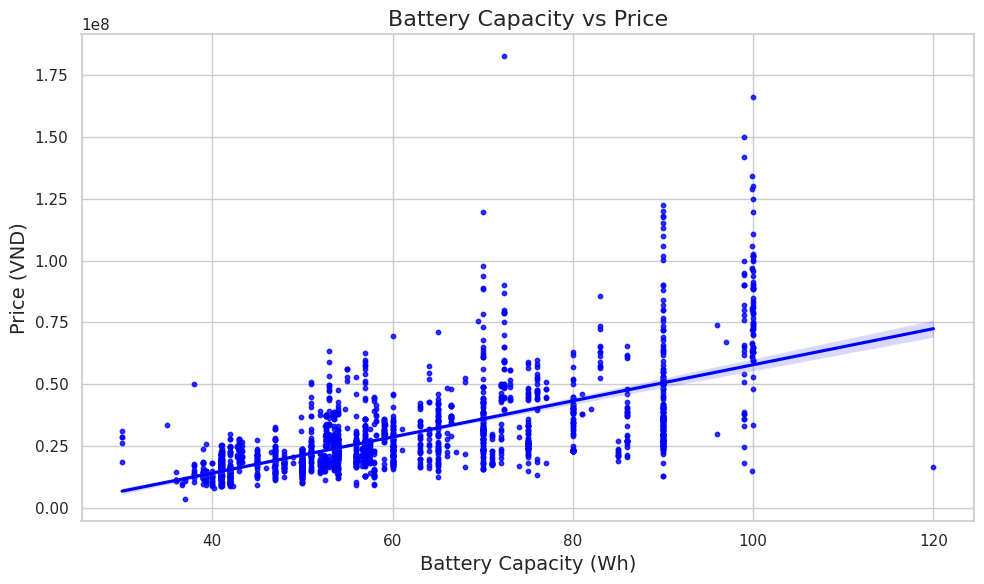

In [74]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=full_relation, x='laptop_specs_battery_capacity', y='laptop_specs_price', color='blue', scatter_kws={'s': 10})

# Add titles and labels
plt.title("Battery Capacity vs Price", fontsize=16)
plt.xlabel("Battery Capacity (Wh)", fontsize=14)
plt.ylabel("Price (VND)", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Connectivity Features

#### Basic analysis

In [97]:
# Print unique values and their counts for number of USB-A ports
usb_a_counts = full_relation['laptop_specs_number_usb_a_ports'].value_counts()
print("Unique values and counts for number of USB-A ports:")
print(usb_a_counts)

# Print unique values and their counts for number of USB-C ports
usb_c_counts = full_relation['laptop_specs_number_usb_c_ports'].value_counts()
print("\nUnique values and counts for number of USB-C ports:")
print(usb_c_counts)

# Print unique values and their counts for number of HDMI ports
hdmi_counts = full_relation['laptop_specs_number_hdmi_ports'].value_counts()
print("\nUnique values and counts for number of HDMI ports:")
print(hdmi_counts)

# Print unique values and their counts for number of Ethernet ports
ethernet_counts = full_relation['laptop_specs_number_ethernet_ports'].value_counts()
print("\nUnique values and counts for number of Ethernet ports:")
print(ethernet_counts)

# Print unique values and their counts for number of audio jacks
audio_jack_counts = full_relation['laptop_specs_number_audio_jacks'].value_counts()
print("\nUnique values and counts for number of audio jacks:")
print(audio_jack_counts)

Unique values and counts for number of USB-A ports:
laptop_specs_number_usb_a_ports
0.0    1309
2.0     570
3.0     367
1.0     192
4.0      21
6.0       5
5.0       2
Name: count, dtype: int64

Unique values and counts for number of USB-C ports:
laptop_specs_number_usb_c_ports
1.0    1125
2.0     697
0.0     514
3.0     105
4.0      25
Name: count, dtype: int64

Unique values and counts for number of HDMI ports:
laptop_specs_number_hdmi_ports
1.0    2121
0.0     345
Name: count, dtype: int64

Unique values and counts for number of Ethernet ports:
laptop_specs_number_ethernet_ports
0.0    2071
1.0     395
Name: count, dtype: int64

Unique values and counts for number of audio jacks:
laptop_specs_number_audio_jacks
0.0    1508
1.0     958
Name: count, dtype: int64


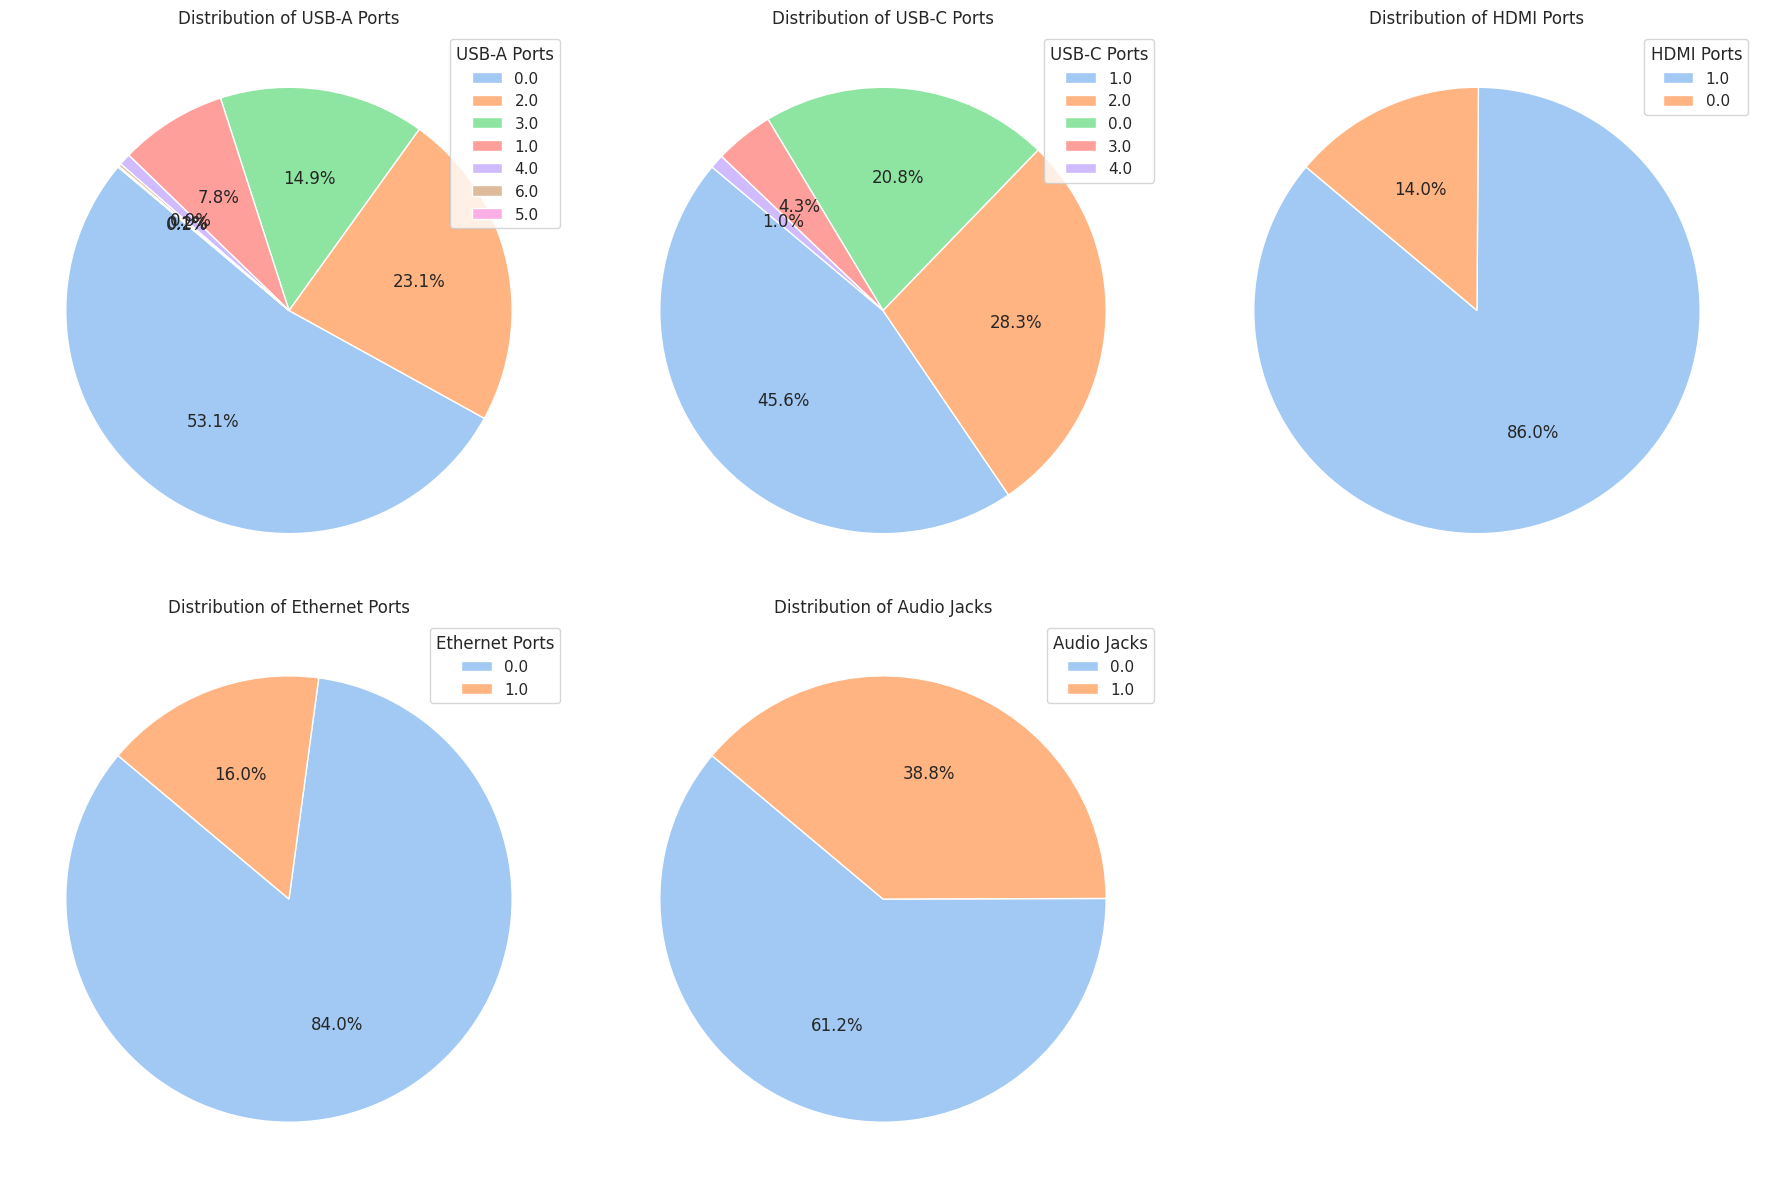

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot the pie chart for number of USB-A ports
usb_a_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    ax=axes[0],
    colors=sns.color_palette('pastel', len(usb_a_counts)),
    labels=None  # Remove labels
)
axes[0].set_title("Distribution of USB-A Ports")
axes[0].set_ylabel('')
axes[0].legend(usb_a_counts.index, title="USB-A Ports", loc="best")

# Plot the pie chart for number of USB-C ports
usb_c_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    ax=axes[1],
    colors=sns.color_palette('pastel', len(usb_c_counts)),
    labels=None  # Remove labels
)
axes[1].set_title("Distribution of USB-C Ports")
axes[1].set_ylabel('')
axes[1].legend(usb_c_counts.index, title="USB-C Ports", loc="best")

# Plot the pie chart for number of HDMI ports
hdmi_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    ax=axes[2],
    colors=sns.color_palette('pastel', len(hdmi_counts)),
    labels=None  # Remove labels
)
axes[2].set_title("Distribution of HDMI Ports")
axes[2].set_ylabel('')
axes[2].legend(hdmi_counts.index, title="HDMI Ports", loc="best")

# Plot the pie chart for number of Ethernet ports
ethernet_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    ax=axes[3],
    colors=sns.color_palette('pastel', len(ethernet_counts)),
    labels=None  # Remove labels
)
axes[3].set_title("Distribution of Ethernet Ports")
axes[3].set_ylabel('')
axes[3].legend(ethernet_counts.index, title="Ethernet Ports", loc="best")

# Plot the pie chart for number of Audio Jacks
audio_jack_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    ax=axes[4],
    colors=sns.color_palette('pastel', len(audio_jack_counts)),
    labels=None  # Remove labels
)
axes[4].set_title("Distribution of Audio Jacks")
axes[4].set_ylabel('')
axes[4].legend(audio_jack_counts.index, title="Audio Jacks", loc="best")

# Remove the last empty subplot
fig.delaxes(axes[5])

# Adjust layout
plt.tight_layout()
plt.show()


#### Analysis connectivity to price

In [103]:
# Calculate the correlation between connectivity features and price
correlation_usb_a_price = full_relation['laptop_specs_number_usb_a_ports'].corr(full_relation['laptop_specs_price'])
correlation_usb_c_price = full_relation['laptop_specs_number_usb_c_ports'].corr(full_relation['laptop_specs_price'])
correlation_hdmi_price = full_relation['laptop_specs_number_hdmi_ports'].corr(full_relation['laptop_specs_price'])
correlation_ethernet_price = full_relation['laptop_specs_number_ethernet_ports'].corr(full_relation['laptop_specs_price'])
correlation_audio_jack_price = full_relation['laptop_specs_number_audio_jacks'].corr(full_relation['laptop_specs_price'])

# Print the correlation results
print(f"Correlation between number of USB-A ports and price: {correlation_usb_a_price:.2f}")
print(f"Correlation between number of USB-C ports and price: {correlation_usb_c_price:.2f}")
print(f"Correlation between number of HDMI ports and price: {correlation_hdmi_price:.2f}")
print(f"Correlation between number of Ethernet ports and price: {correlation_ethernet_price:.2f}")
print(f"Correlation between number of audio jacks and price: {correlation_audio_jack_price:.2f}")

Correlation between number of USB-A ports and price: -0.10
Correlation between number of USB-C ports and price: 0.20
Correlation between number of HDMI ports and price: -0.17
Correlation between number of Ethernet ports and price: -0.07
Correlation between number of audio jacks and price: -0.02


### Software Features

#### Default OS

Basic analysis

In [81]:
# Print unique values and their counts for default OS
os_counts = full_relation['laptop_specs_default_os'].value_counts()

# Replace 'window' with 'windows' in the 'laptop_specs_default_os' column
full_relation['laptop_specs_default_os'] = full_relation['laptop_specs_default_os'].apply(lambda x: 'windows' if x is not None and 'window' in x.lower() else x)

# Print the updated unique OS and their counts
os_counts = full_relation['laptop_specs_default_os'].value_counts()
print("Unique OS and their counts:")
print(os_counts)

Unique OS and their counts:
laptop_specs_default_os
windows      2283
macos         296
linux          26
chrome os       2
Name: count, dtype: int64


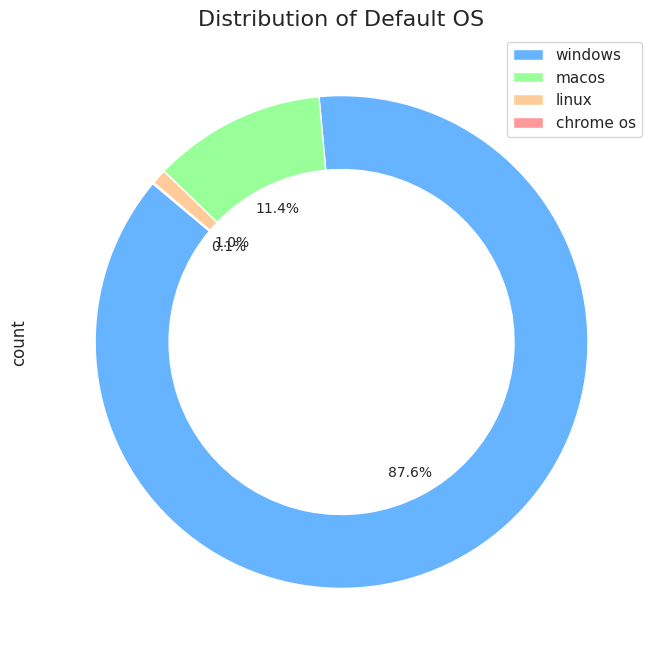

In [90]:
# Plot the pie chart for default OS
plt.figure(figsize=(8, 8))
os_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999'],
    labels=None,  # Remove labels from the pie chart
    wedgeprops=dict(width=0.3),
    textprops={'fontsize': 10}  # Adjust text size
)

# Add a legend for categories
plt.legend(os_counts.index, loc="best")

# Add title
plt.title("Distribution of Default OS", fontsize=16)

# Show the plot
plt.show()


#### Warranty

In [91]:
# Print unique values and their counts for warranty
warranty_counts = full_relation['laptop_specs_warranty'].value_counts()
print("Unique warranty values and their counts:")
print(warranty_counts)

Unique warranty values and their counts:
laptop_specs_warranty
12.0    1288
24.0     920
36.0     105
18.0       2
Name: count, dtype: int64


Correlation between warranty and price: 0.08


/tmp/ipykernel_538/2459959301.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_relation, x='laptop_specs_warranty', y='laptop_specs_price', palette="viridis")


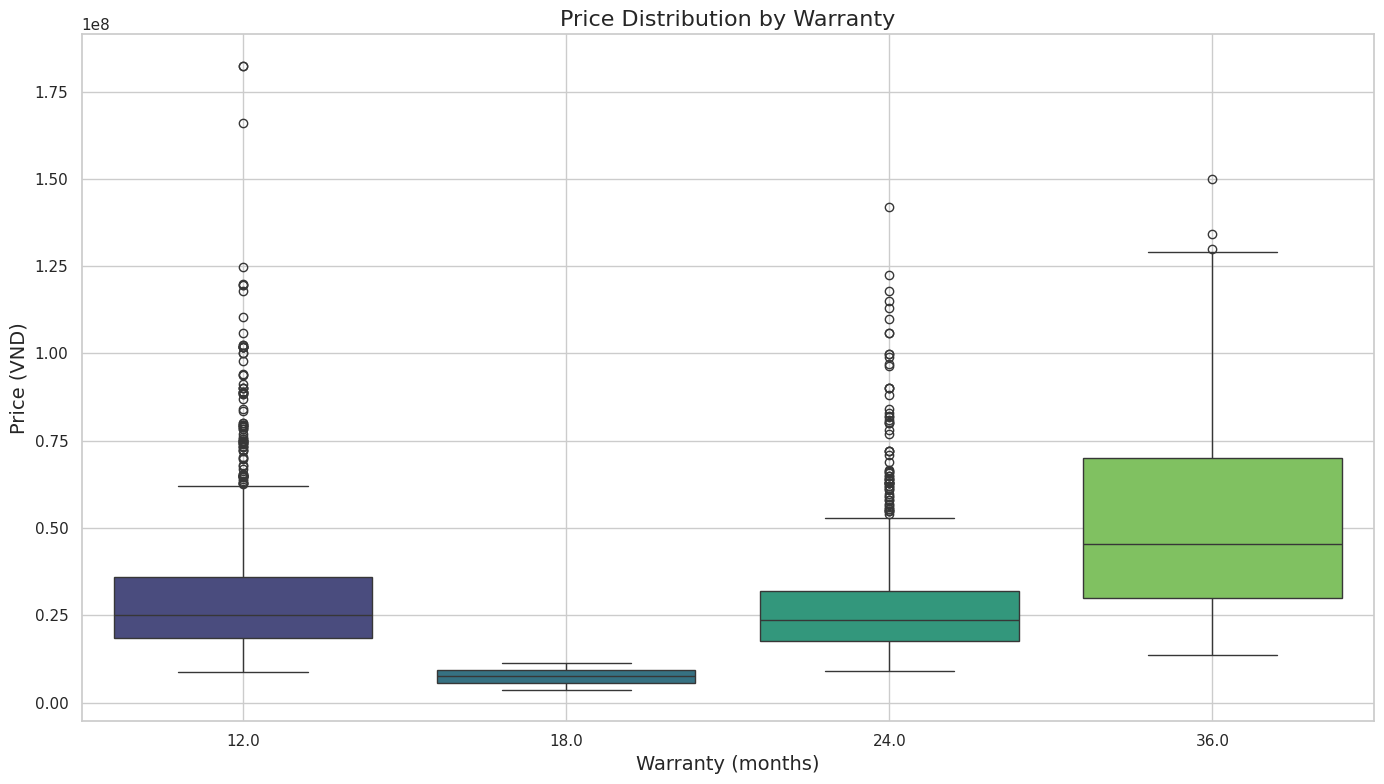

In [93]:
# Print correlation
correlation_warranty_price = full_relation['laptop_specs_warranty'].corr(full_relation['laptop_specs_price'])
print(f"Correlation between warranty and price: {correlation_warranty_price:.2f}")

# Set the plot style
sns.set_theme(style="whitegrid")

# Create a boxplot for price distribution by warranty
plt.figure(figsize=(14, 8))
sns.boxplot(data=full_relation, x='laptop_specs_warranty', y='laptop_specs_price', palette="viridis")

# Add titles and labels
plt.title("Price Distribution by Warranty", fontsize=16)
plt.xlabel("Warranty (months)", fontsize=14)
plt.ylabel("Price (VND)", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

### Target Feature: price

Basic statistics

In [ ]:
# Calculate basic statistics for the price column
price_stats = full_relation['laptop_specs_price'].describe()

# Print the statistics
print("Basic Statistics for Price:")
print(price_stats)

Basic Statistics for Price:
count    2.702000e+03
mean     2.942449e+07
std      1.869344e+07
min      3.590000e+06
25%      1.799000e+07
50%      2.399000e+07
75%      3.464000e+07
max      1.824900e+08
Name: laptop_specs_price, dtype: float64


Visualizing the distribution

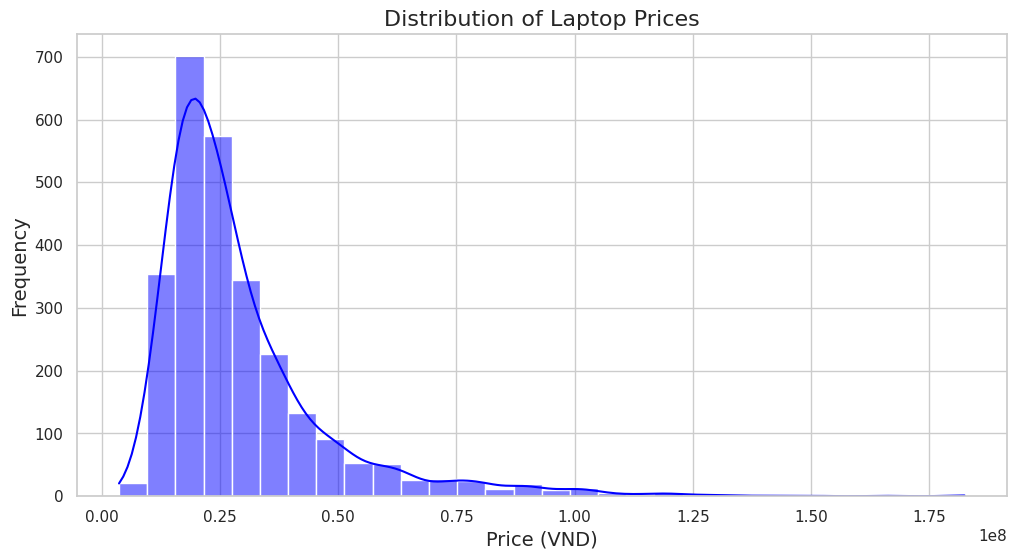

In [ ]:
# Plot the distribution of laptop prices
plt.figure(figsize=(12, 6))
sns.histplot(full_relation['laptop_specs_price'], kde=True, color='blue', bins=30)

# Add labels and title
plt.title("Distribution of Laptop Prices", fontsize=16)
plt.xlabel("Price (VND)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Show the plot
plt.show()

/tmp/ipykernel_18917/2849463995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=full_relation, x='laptop_specs_price', palette="viridis")


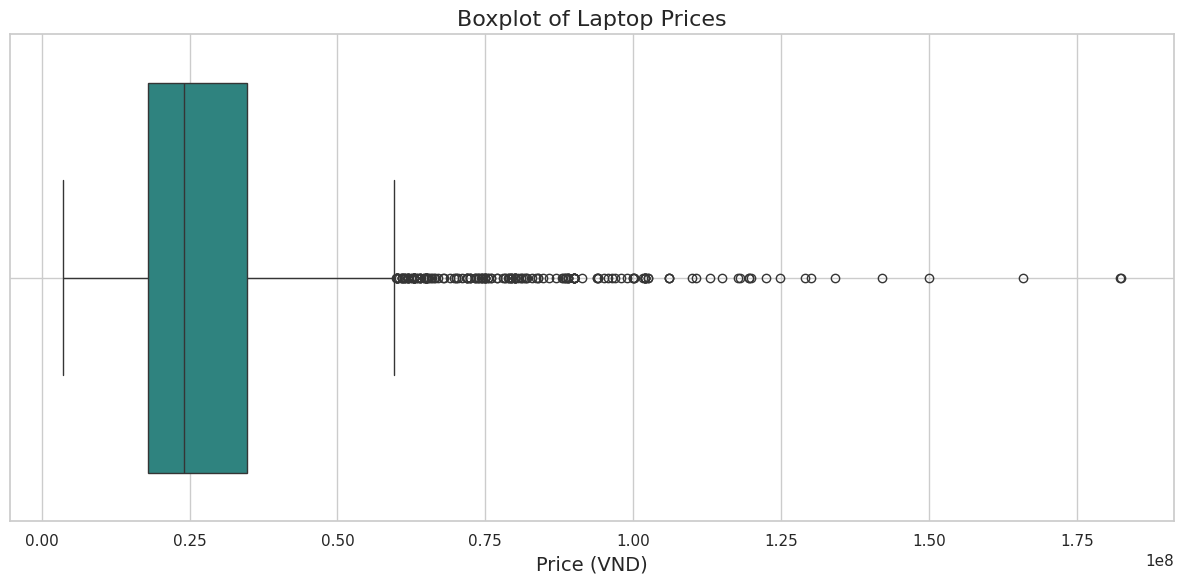

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_relation, x='laptop_specs_price', palette="viridis")

# Add titles and labels
plt.title("Boxplot of Laptop Prices", fontsize=16)
plt.xlabel("Price (VND)", fontsize=14)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
